In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
plt.style.use("seaborn-whitegrid")

import seaborn as sns
from collections import OrderedDict
cmaps = OrderedDict()

import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/tmp/ipykernel_34/559659473.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


/kaggle/input/customer-analytics/Train.csv


In [2]:
#load data
df = pd.read_csv("/kaggle/input/customer-analytics/Train.csv")
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                59           3088                    1  
2                48           3374                    1  
3                10           1177                    1  
4                46           2484                    1

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [4]:
df.describe()

ID  Customer_care_calls  Customer_rating  Cost_of_the_Product  \
count  10999.00000         10999.000000     10999.000000         10999.000000   
mean    5500.00000             4.054459         2.990545           210.196836   
std     3175.28214             1.141490         1.413603            48.063272   
min        1.00000             2.000000         1.000000            96.000000   
25%     2750.50000             3.000000         2.000000           169.000000   
50%     5500.00000             4.000000         3.000000           214.000000   
75%     8249.50000             5.000000         4.000000           251.000000   
max    10999.00000             7.000000         5.000000           310.000000   

       Prior_purchases  Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
count     10999.000000      10999.000000   10999.000000         10999.000000  
mean          3.567597         13.373216    3634.016729             0.596691  
std           1.522860         16.205527    1635.377251             0.490584  
min           2.000000          1.000000    1001.000000             0.000000  
25%           3.000000          4.000000    1839.500000             0.000000  
50%           3.000000          7.000000    4149.000000             1.000000  
75%           4.000000         10.000000    5050.000000             1.000000  
max          10.000000         65.000000    7846.000000             1.000000

In [5]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
def categorical_vis(variable):
    
    var = df[variable].value_counts()
    
    x = var.index
    y = var
    if variable == "Reached.on.Time_Y.N":
        plt.bar(x,y,edgecolor="#1F1F1F",color='#636363')
        plt.title(variable,fontsize=12,fontweight="bold",color="#1F1F1F")
        plt.ylabel("Frequency")
        plt.xticks([0,1])
        plt.show()
        print("{}: \n {}".format(variable,var))
    else:
        plt.bar(x,y,edgecolor="#1F1F1F",color='#636363')
        plt.title(variable,fontsize=12,fontweight="bold",color="#1F1F1F")
        plt.ylabel("Frequency")
        plt.show()
        print("{}: \n {}".format(variable,var))

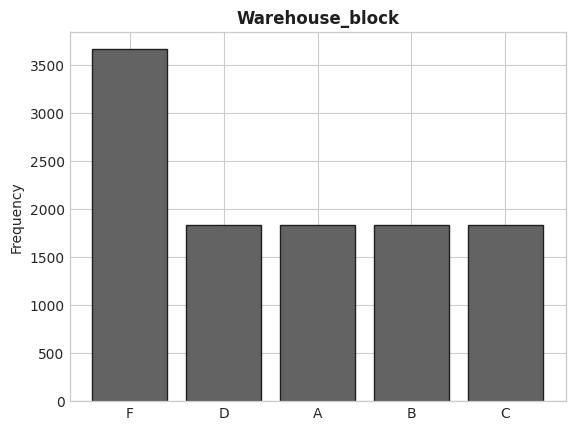

Warehouse_block: 
 Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64


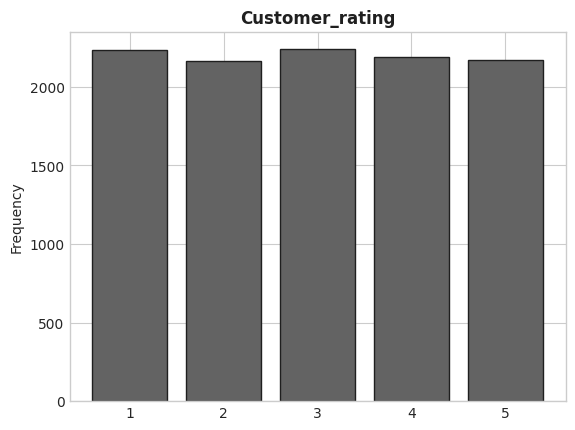

Customer_rating: 
 Customer_rating
3    2239
1    2235
4    2189
5    2171
2    2165
Name: count, dtype: int64


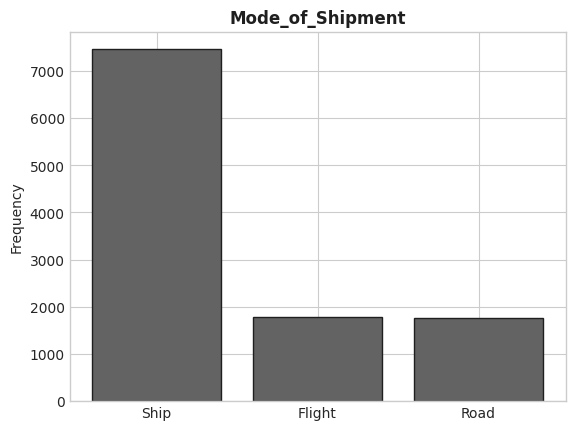

Mode_of_Shipment: 
 Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64


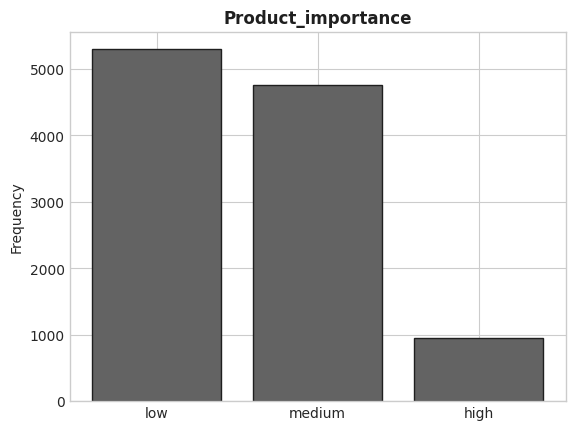

Product_importance: 
 Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64


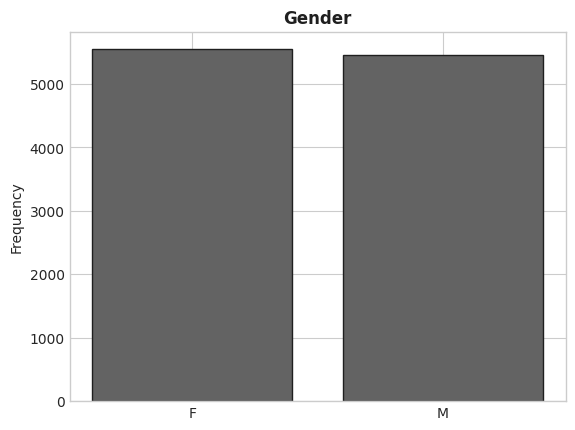

Gender: 
 Gender
F    5545
M    5454
Name: count, dtype: int64


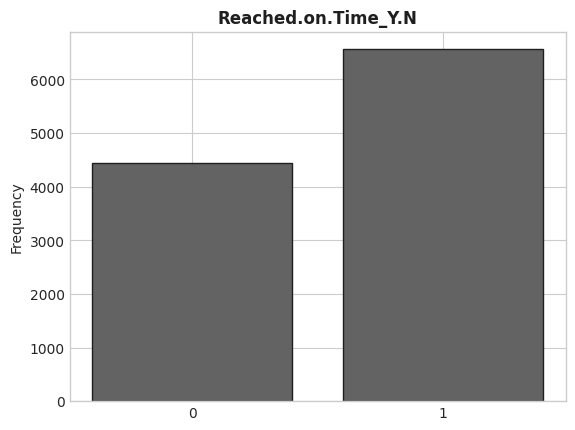

Reached.on.Time_Y.N: 
 Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


In [7]:
categorical = ["Warehouse_block","Customer_rating","Mode_of_Shipment","Product_importance","Gender","Reached.on.Time_Y.N"]
for cat in categorical:
    categorical_vis(cat)

In [8]:
def numerical_vis(variable):
    plt.figure(figsize = (9,3))
    plt.hist(df[variable],bins=50,color='#636363')
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable),fontsize=12,fontweight="bold",color="#1F1F1F")
    plt.show()

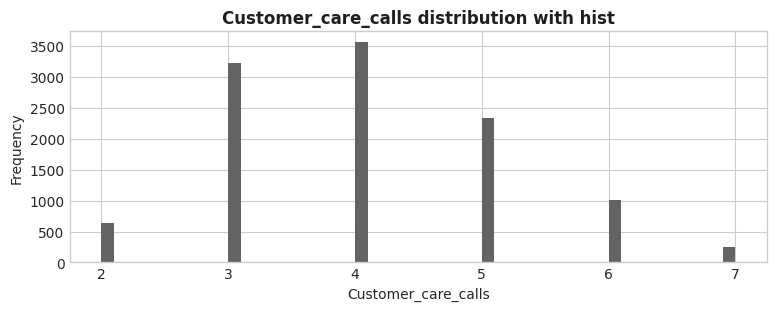

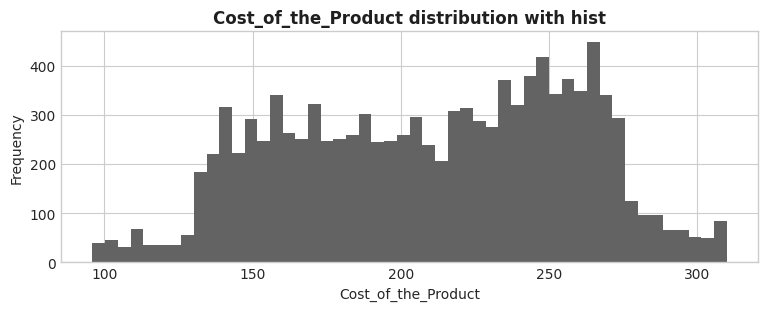

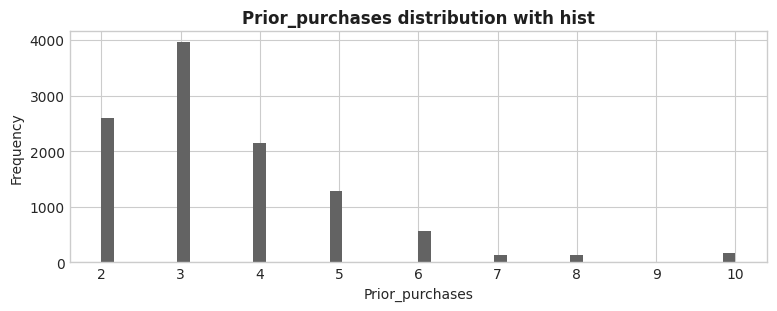

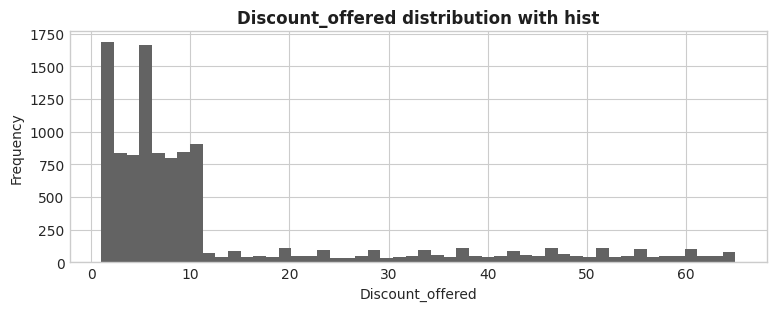

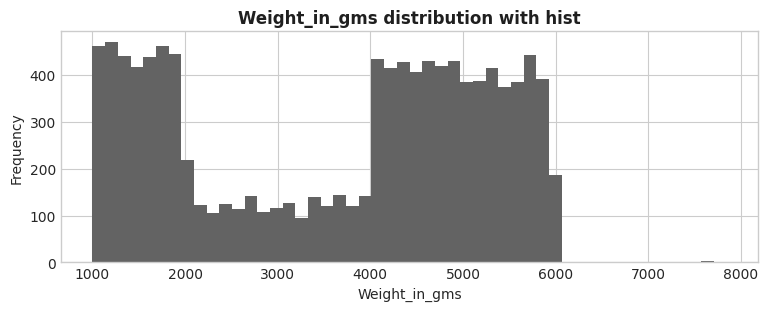

In [9]:
numerical = ["Customer_care_calls","Cost_of_the_Product","Prior_purchases","Discount_offered","Weight_in_gms"]
for num in numerical:
    numerical_vis(num)

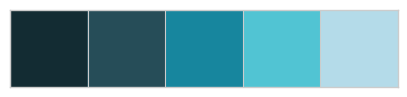

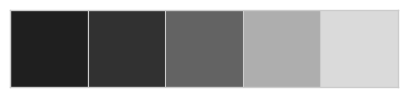

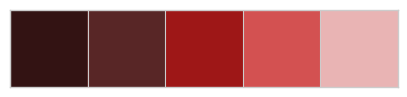

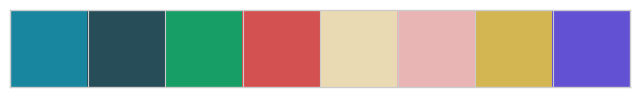

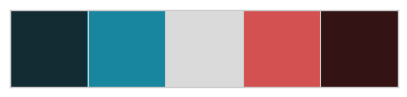

In [10]:
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#132C33", '#17869E', '#DADADA', '#D35151', '#331313']
sns.set_palette("mako")
sns.palplot(colors_blue)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

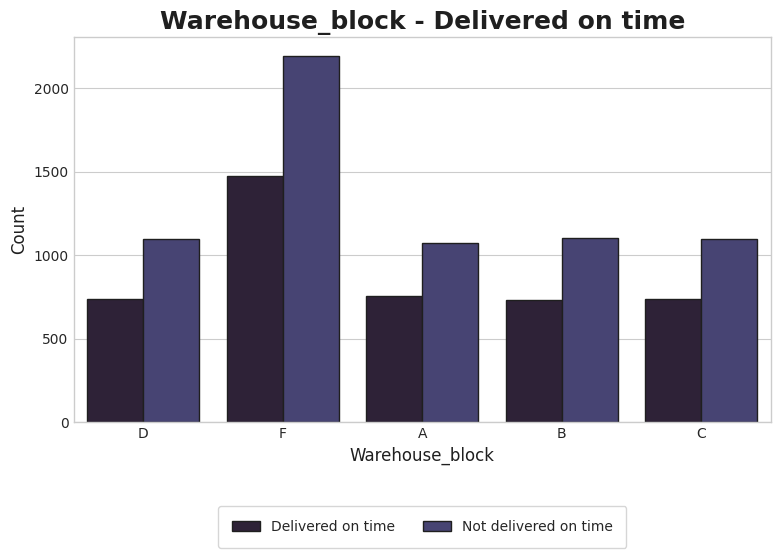

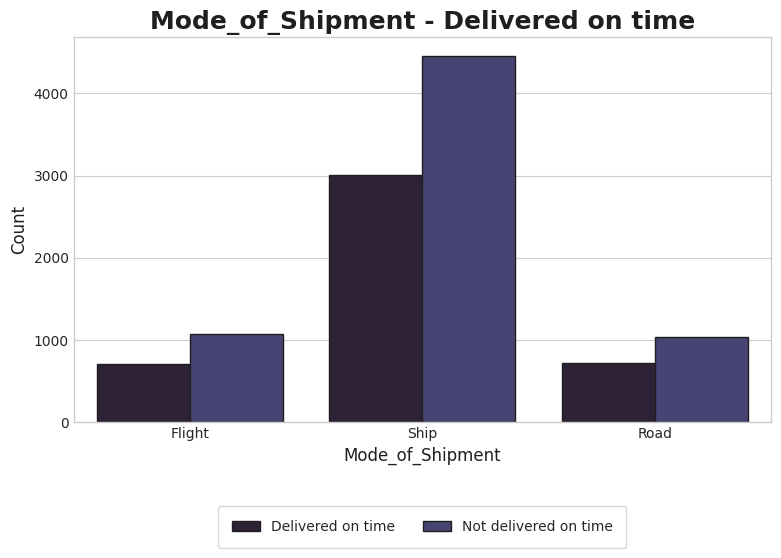

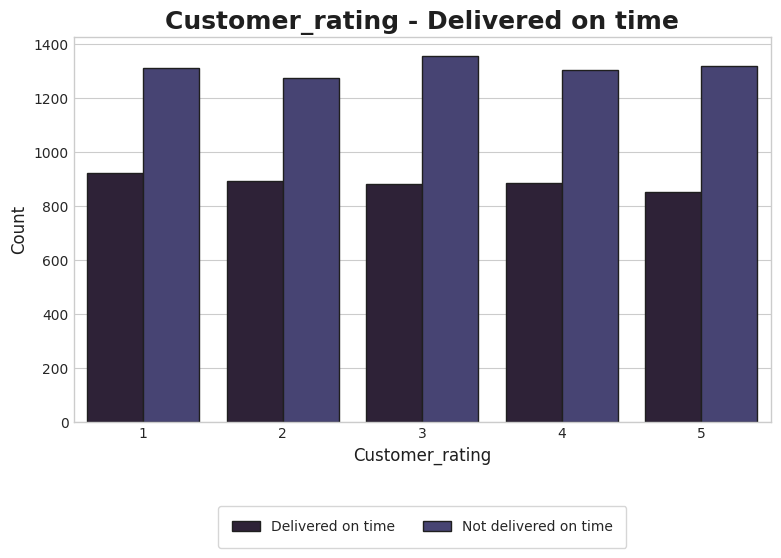

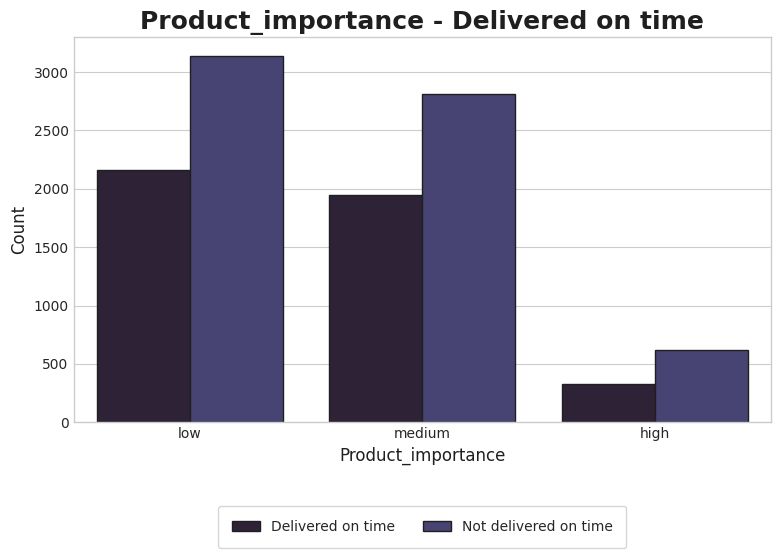

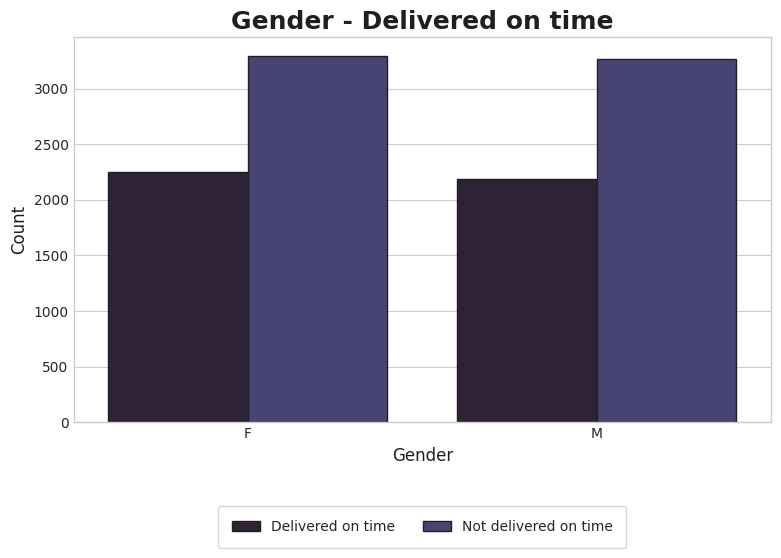

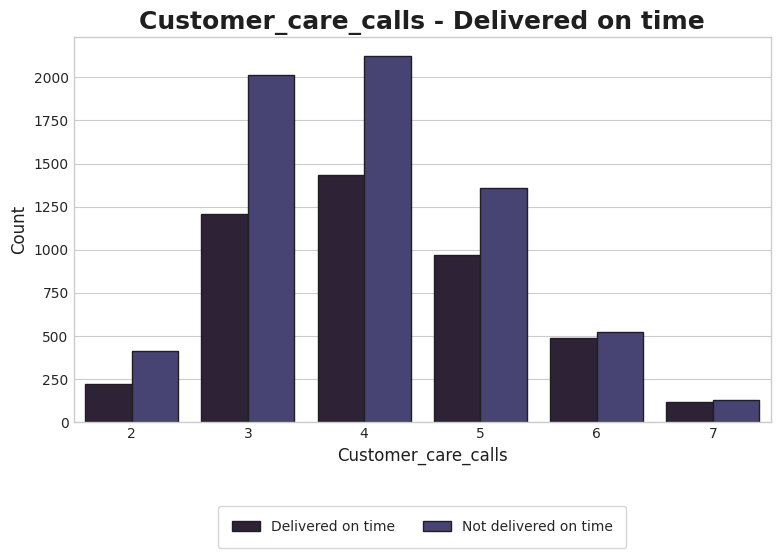

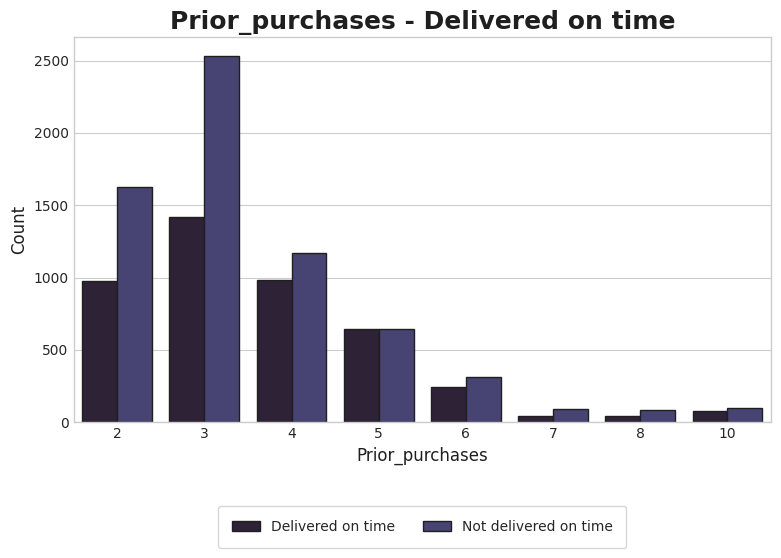

In [11]:
features = ["Warehouse_block","Mode_of_Shipment","Customer_rating","Product_importance","Gender","Customer_care_calls","Prior_purchases"]
for f in features:
    fig, ax = plt.subplots(figsize=(9, 5))
    sns.countplot(x=f,data=df,hue="Reached.on.Time_Y.N",edgecolor=colors_dark[0])
    ax.legend(["Delivered on time","Not delivered on time"],loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, borderpad=1, frameon=True, fontsize=10)
    plt.ylabel("Count",fontsize=12, fontweight='light', color=colors_dark[0])
    plt.xlabel(f"{f}",fontsize=12, fontweight='light', color=colors_dark[0])
    plt.title("{} - Delivered on time".format(f), fontsize=18, fontweight='bold', color=colors_dark[0])
    plt.show()

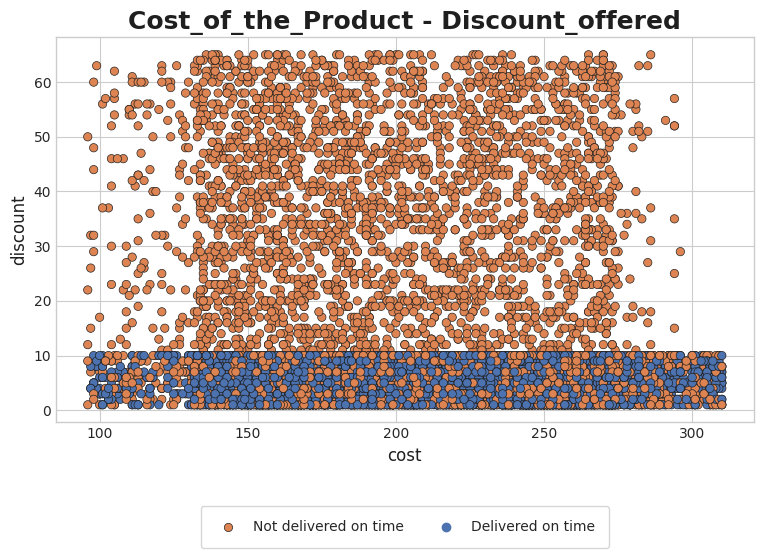

In [12]:
fig, ax = plt.subplots(figsize=(9,5))
sns.scatterplot(x="Cost_of_the_Product",y="Discount_offered",hue="Reached.on.Time_Y.N",data=df,edgecolor=colors_dark[0],palette="deep")
ax.legend(["Not delivered on time","Delivered on time"],loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, borderpad=1, frameon=True, fontsize=10)
plt.ylabel("discount",fontsize=12, fontweight='light', color=colors_dark[0])
plt.xlabel("cost",fontsize=12, fontweight='light', color=colors_dark[0])
plt.title("Cost_of_the_Product - Discount_offered", fontsize=18, fontweight='bold', color=colors_dark[0])
plt.show()

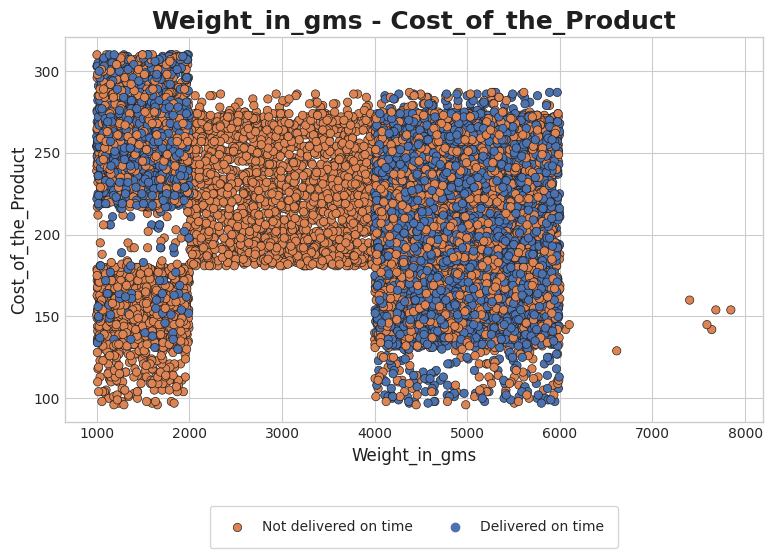

In [13]:
fig, ax = plt.subplots(figsize=(9, 5))
sns.scatterplot(x="Weight_in_gms",y="Cost_of_the_Product",hue="Reached.on.Time_Y.N",data=df,edgecolor=colors_dark[0],palette="deep")
ax.legend(["Not delivered on time","Delivered on time"],loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, borderpad=1, frameon=True, fontsize=10)
plt.ylabel("Cost_of_the_Product",fontsize=12, fontweight='light', color=colors_dark[0])
plt.xlabel("Weight_in_gms",fontsize=12, fontweight='light', color=colors_dark[0])
plt.title("Weight_in_gms - Cost_of_the_Product", fontsize=18, fontweight='bold', color=colors_dark[0])
plt.show()

In [14]:
rate_mean = []
avg = df["Customer_rating"].mean()
for i in range(2,8):
    rate_mean.append(float(df[df["Customer_care_calls"]==i]["Customer_rating"].mean()))
calls=df.Customer_care_calls.sort_values(ascending=True).unique()

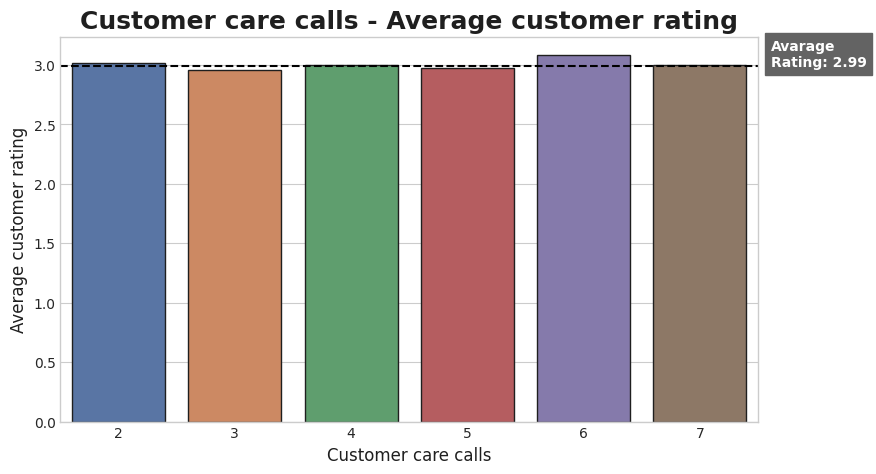

In [15]:
df[df["Customer_care_calls"]==i]["Customer_rating"].mean()
fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(x=calls,y=rate_mean,edgecolor=colors_dark[0],palette="deep")
ax.axhline(avg, linestyle='--', color="black")
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
ax.text(
    s="Avarage\nRating: {:.2f}".format(avg),
    x=xmax*1.02,
    y=avg,
    backgroundcolor=colors_dark[2],
    fontsize=10,
    fontweight='bold',
    color='white'
)
plt.ylabel("Average customer rating",fontsize=12, fontweight='light', color=colors_dark[0])
plt.xlabel("Customer care calls",fontsize=12, fontweight='light', color=colors_dark[0])
plt.title("Customer care calls - Average customer rating", fontsize=18, fontweight='bold', color=colors_dark[0])
plt.show()

In [20]:
#one hot encoding
cleaned_data_corr = pd.get_dummies(df, columns=["Warehouse_block","Mode_of_Shipment","Gender"])
#label encoding
cleaned_data_corr["Product_importance"].replace({"low":0,"medium":1,"high":2},inplace=True)
cleaned_data_corr["Reached.on.Time_Y.N"].replace({1:0,0:1},inplace=True)
#Drop ID column
cleaned_data_corr.drop(columns=["ID"],axis=1,inplace=True)

<Axes: >

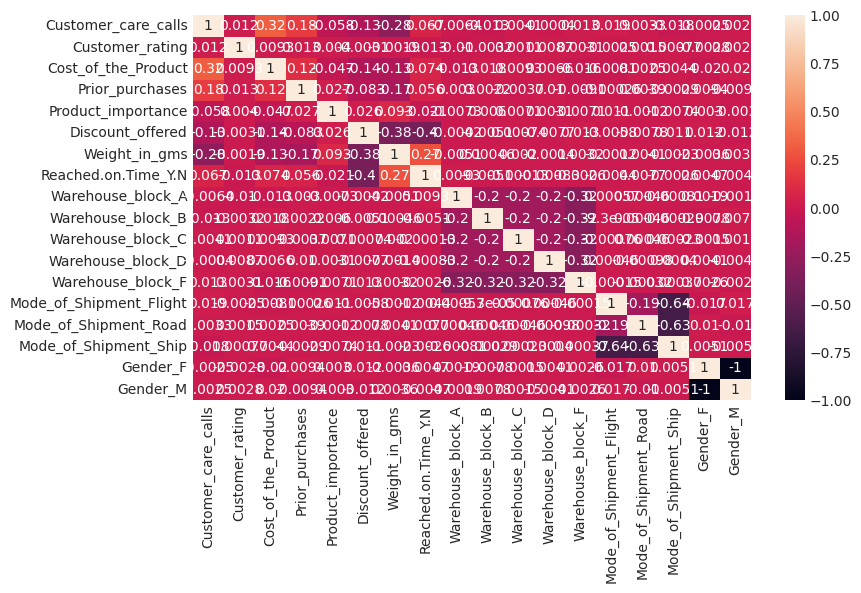

In [21]:
plt.figure(figsize=(9,5))
sns.heatmap(cleaned_data_corr.corr(),annot=True)

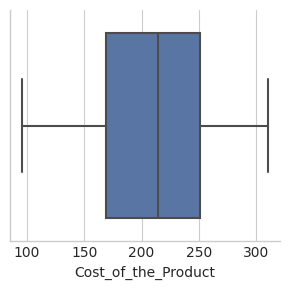

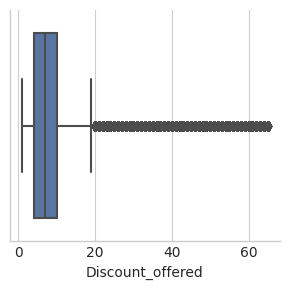

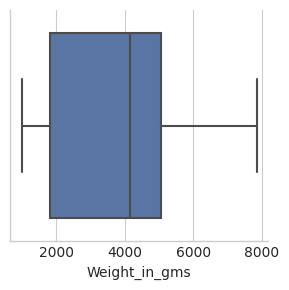

In [22]:
boxes = ["Cost_of_the_Product","Discount_offered","Weight_in_gms"]
for bx in boxes:
    g = sns.FacetGrid(df)
    g.map(sns.boxplot, bx,palette="deep")
    plt.show()

In [23]:
#import
from scipy.stats import zscore

for i in boxes:
    print(i)
    z_scores = zscore(df[i])
    print("*"*50)
    for threshold in np.arange(1.5,5,0.5):
        print("Treshold: {}".format(threshold))
        print("Amount of Outliers: {}".format(len((np.where(z_scores > threshold)[0]))))
        print('------')

Cost_of_the_Product
**************************************************
Treshold: 1.5
Amount of Outliers: 454
------
Treshold: 2.0
Amount of Outliers: 66
------
Treshold: 2.5
Amount of Outliers: 0
------
Treshold: 3.0
Amount of Outliers: 0
------
Treshold: 3.5
Amount of Outliers: 0
------
Treshold: 4.0
Amount of Outliers: 0
------
Treshold: 4.5
Amount of Outliers: 0
------
Discount_offered
**************************************************
Treshold: 1.5
Amount of Outliers: 1382
------
Treshold: 2.0
Amount of Outliers: 999
------
Treshold: 2.5
Amount of Outliers: 584
------
Treshold: 3.0
Amount of Outliers: 181
------
Treshold: 3.5
Amount of Outliers: 0
------
Treshold: 4.0
Amount of Outliers: 0
------
Treshold: 4.5
Amount of Outliers: 0
------
Weight_in_gms
**************************************************
Treshold: 1.5
Amount of Outliers: 7
------
Treshold: 2.0
Amount of Outliers: 5
------
Treshold: 2.5
Amount of Outliers: 1
------
Treshold: 3.0
Amount of Outliers: 0
------
Treshold: 

In [24]:
for i in boxes:
    z_scores = zscore(df[i])
    print(z_scores)

0       -0.690722
1        0.120746
2       -0.565881
3       -0.711529
4       -0.545074
           ...   
10994    0.869792
10995    0.453655
10996    0.661724
10997    0.266394
10998   -1.148472
Name: Cost_of_the_Product, Length: 10999, dtype: float64
0        1.889983
1        2.815636
2        2.136824
3       -0.208162
4        2.013404
           ...   
10994   -0.763553
10995   -0.455002
10996   -0.578423
10997   -0.701843
10998   -0.455002
Name: Discount_offered, Length: 10999, dtype: float64
0       -1.468240
1       -0.333893
2       -0.159002
3       -1.502484
4       -0.703244
           ...   
10994   -1.281730
10995   -1.459679
10996   -1.515937
10997   -1.482304
10998   -1.219968
Name: Weight_in_gms, Length: 10999, dtype: float64


In [25]:
for i in boxes:
    z_scores = zscore(df[i])
    df["z_scores_{}".format(i)] = z_scores
df.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  \
0                44           1233                    1   
1                59           3088                    1   
2                48           3374                    1   
3                10           1177                    1   
4                46           2484                    1   

   z_scores_Cost_of_the_Product  z_scores_Discount_offered  \
0                     -0.690722                   1.889983   
1                      0.120746                   2.815636   
2                     -0.565881                   2.136824   
3                     -0.711529                  -0.208162   
4                     -0.545074                   2.013404   

   z_scores_Weight_in_gms  
0               -1.468240  
1               -0.333893  
2               -0.159002  
3               -1.502484  
4               -0.703244

In [26]:
indeces = df[(df["z_scores_Cost_of_the_Product"]>=2) | (df["z_scores_Discount_offered"]>=2) | (df["z_scores_Weight_in_gms"]>=2)].index.to_list()
cleaned_data = df
for i in indeces:
    cleaned_data = cleaned_data.drop(index=i,axis=0)
cleaned_data[(cleaned_data["z_scores_Cost_of_the_Product"]>=2) | (cleaned_data["z_scores_Discount_offered"]>=2) | (cleaned_data["z_scores_Weight_in_gms"]>=2)]

Empty DataFrame
Columns: [ID, Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Product_importance, Gender, Discount_offered, Weight_in_gms, Reached.on.Time_Y.N, z_scores_Cost_of_the_Product, z_scores_Discount_offered, z_scores_Weight_in_gms]
Index: []

In [27]:
#Dropping z_score columns
df.drop(columns=["z_scores_Cost_of_the_Product","z_scores_Discount_offered","z_scores_Weight_in_gms"],axis=1,inplace=True)
cleaned_data.drop(columns=["z_scores_Cost_of_the_Product","z_scores_Discount_offered","z_scores_Weight_in_gms"],axis=1,inplace=True)

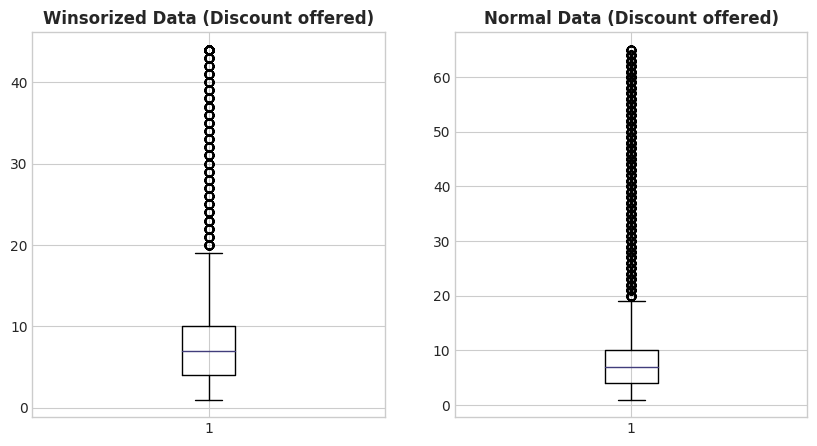

In [28]:
#import
from scipy.stats.mstats import winsorize
winsorized= winsorize(df["Discount_offered"],(0,0.10))
#Visualization
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.boxplot(winsorized)
plt.title("Winsorized Data (Discount offered)",fontsize=12,fontweight="bold")
plt.subplot(1,2,2)
plt.boxplot(df["Discount_offered"].values)
plt.title("Normal Data (Discount offered)",fontsize=12,fontweight="bold")
plt.show()

In [29]:
winsorized_data = df
winsorized_data["Discount_offered"] = winsorized
winsorized_data.head()

ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4                2   
1   2               F           Flight                    4                5   
2   3               A           Flight                    2                2   
3   4               B           Flight                    3                3   
4   5               C           Flight                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  Reached.on.Time_Y.N  
0                44           1233                    1  
1                44           3088                    1  
2                44           3374                    1  
3                10           1177                    1  
4                44           2484                    1

In [30]:
# Feature extraction - Discount Rate
new = winsorized_data["Cost_of_the_Product"]/winsorized_data["Weight_in_gms"]
winsorized_data["discount_rate"] = new.values

In [31]:
#one hot encoding
cleaned_data = pd.get_dummies(cleaned_data, columns=["Warehouse_block","Mode_of_Shipment","Gender"])
#label encoding
cleaned_data["Product_importance"].replace({"low":0,"medium":1,"high":2},inplace=True)
cleaned_data["Reached.on.Time_Y.N"].replace({1:0,0:1},inplace=True)
#Drop ID column
cleaned_data.drop(columns=["ID"],axis=1,inplace=True)

#one hot encoding
winsorized_data = pd.get_dummies(winsorized_data, columns=["Warehouse_block","Mode_of_Shipment","Gender"])
#label encoding
winsorized_data["Product_importance"].replace({"low":0,"medium":1,"high":2},inplace=True)
winsorized_data["Reached.on.Time_Y.N"].replace({1:0,0:1},inplace=True)
#Drop ID column
winsorized_data.drop(columns=["ID"],axis=1,inplace=True)

winsorized_data.reset_index(drop=True,inplace=True)
cleaned_data.reset_index(drop=True,inplace=True)

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

con_data= cleaned_data[["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"]]
con_data2= winsorized_data[["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"]]

X = StandardScaler().fit_transform(con_data)
X2 = StandardScaler().fit_transform(con_data2)

sklearn_pca = PCA(n_components=2)
Y_sklearn = sklearn_pca.fit_transform(X)

sklearn_pca2 = PCA(n_components=2)
Y_sklearn2 = sklearn_pca2.fit_transform(X2)
print("Outliers Deleted Data")
print(sklearn_pca.explained_variance_ratio_)
print("Cumulative:")
value = 0
for i in sklearn_pca.explained_variance_ratio_:
    value += i
    print(value)

print("\n")
print("Winsorized Data")  
print(sklearn_pca2.explained_variance_ratio_)
print("Cumulative:")
value = 0
for i in sklearn_pca2.explained_variance_ratio_:
    value += i
    print(value)

Outliers Deleted Data
[0.39064276 0.3145339 ]
Cumulative:
0.3906427645878041
0.7051766656806462


Winsorized Data
[0.37517334 0.33991853]
Cumulative:
0.3751733365160717
0.7150918712928174


In [33]:
pca_new = pd.DataFrame(Y_sklearn,columns=["PC1","PC2"])
pca_new2 = pd.DataFrame(Y_sklearn2,columns=["PC1","PC2"])

clean_pca = pd.concat([cleaned_data,pca_new],axis=1)
clean_pca = clean_pca.drop(columns=["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"])

win_pca = pd.concat([winsorized_data,pca_new2],axis=1)
win_pca = win_pca.drop(columns=["Customer_care_calls","Cost_of_the_Product","Discount_offered","Weight_in_gms"])

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

#non-pca and outliers deleted data
non_cl_y = cleaned_data["Reached.on.Time_Y.N"]
non_cl_X = cleaned_data.drop(["Reached.on.Time_Y.N"],axis=1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(non_cl_X,non_cl_y,test_size=0.33,random_state=123)

#non-pca and winsorized data
non_win_y = winsorized_data["Reached.on.Time_Y.N"]
non_win_X = winsorized_data.drop(["Reached.on.Time_Y.N"],axis=1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(non_win_X,non_win_y,test_size=0.33,random_state=123)

#pca and outliers deleted data
cl_y = clean_pca["Reached.on.Time_Y.N"]
cl_X = clean_pca.drop(["Reached.on.Time_Y.N"],axis=1)

X_train3, X_test3, y_train3, y_test3 = train_test_split(cl_X,cl_y,test_size=0.33,random_state=123)

#pca and winsorized data
win_y = win_pca["Reached.on.Time_Y.N"]
win_X = win_pca.drop(["Reached.on.Time_Y.N"],axis=1)

X_train4, X_test4, y_train4, y_test4 = train_test_split(win_X,win_y,test_size=0.33,random_state=123)

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [36]:
# List of models
models = {
    "Random Forest": RandomForestClassifier(max_depth=7, min_samples_leaf=1, min_samples_split=4, criterion="entropy", random_state=123),
    "Logistic Regression": LogisticRegression(random_state=123),
    "Gradient Boosting": GradientBoostingClassifier(random_state=123),
    "AdaBoost": AdaBoostClassifier(random_state=123),
    "CatBoost": CatBoostClassifier(random_state=123, verbose=0),
    "LightGBM": LGBMClassifier(random_state=123),
    "XGBoost": XGBClassifier(random_state=123, use_label_encoder=False, eval_metric='mlogloss'),
    "Extra Trees": ExtraTreesClassifier(random_state=123),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=123)
}

In [37]:
# Data configurations
datasets = {
    "non-pca and outliers deleted data": (X_train1, X_test1, y_train1, y_test1),
    "non-pca and winsorized data": (X_train2, X_test2, y_train2, y_test2),
    "pca and outliers deleted data": (X_train3, X_test3, y_train3, y_test3),
    "pca and winsorized data": (X_train4, X_test4, y_train4, y_test4)
}

In [38]:
# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_test)
    train_acc = accuracy_score(y_train, y_pred_train)
    test_acc = accuracy_score(y_test, y_pred_test)
    return cm, train_acc, test_acc, y_pred_test

# Dictionary to store accuracy results
results = {dataset_name: [] for dataset_name in datasets.keys()}

Evaluating on non-pca and outliers deleted data
**************************************************
Model: Random Forest
Confusion Matrix:
[[ 814 1014]
 [ 131 1318]]
Train Accuracy: 0.7036
Test Accuracy: 0.6506
------------------------------


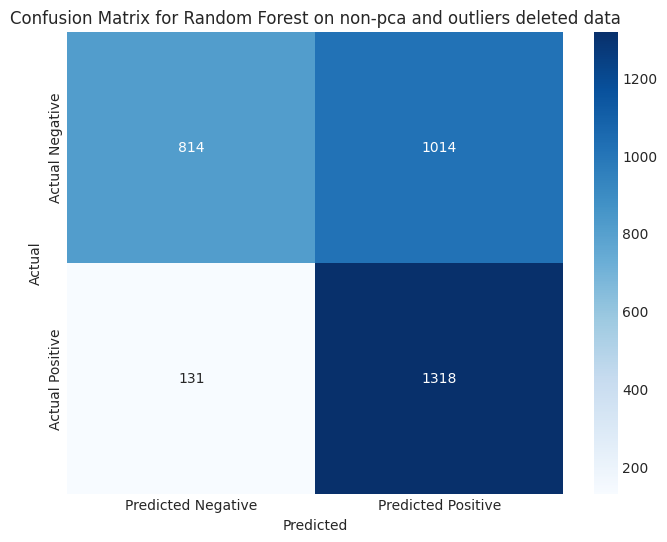

Model: Logistic Regression
Confusion Matrix:
[[1172  656]
 [ 615  834]]
Train Accuracy: 0.5954
Test Accuracy: 0.6121
------------------------------


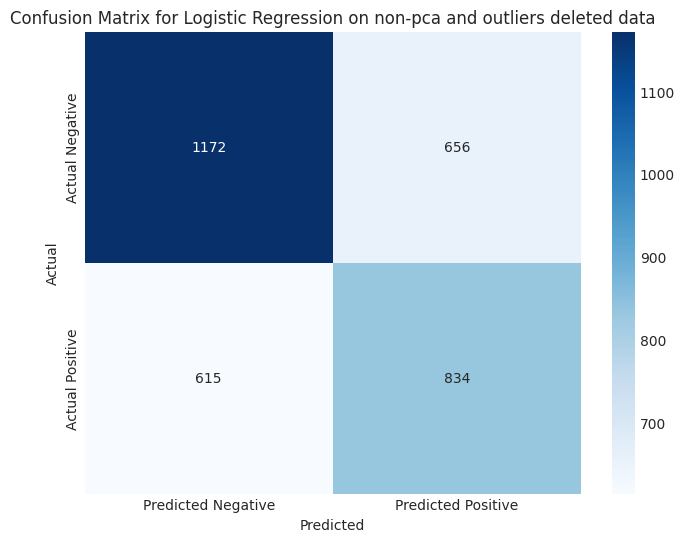

Model: Gradient Boosting
Confusion Matrix:
[[ 844  984]
 [ 152 1297]]
Train Accuracy: 0.6958
Test Accuracy: 0.6533
------------------------------


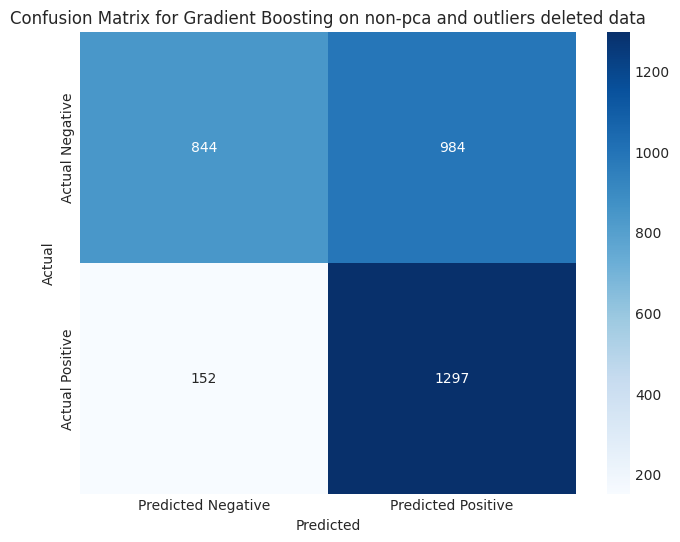

Model: AdaBoost
Confusion Matrix:
[[ 978  850]
 [ 325 1124]]
Train Accuracy: 0.6555
Test Accuracy: 0.6414
------------------------------


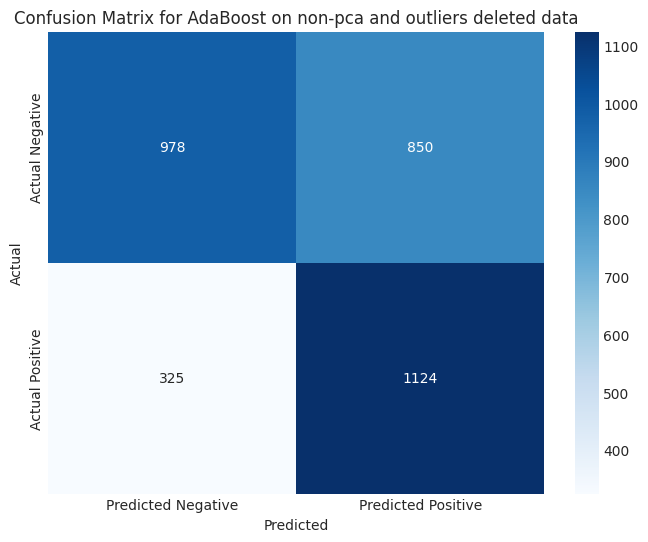

Model: CatBoost
Confusion Matrix:
[[ 996  832]
 [ 362 1087]]
Train Accuracy: 0.8320
Test Accuracy: 0.6356
------------------------------


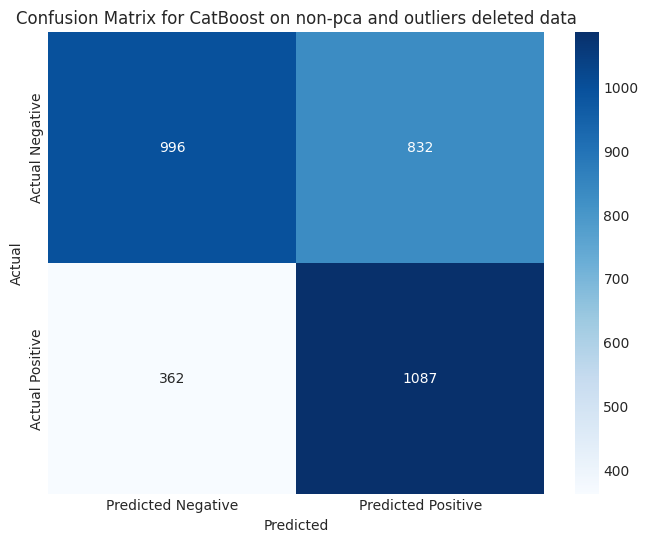

[LightGBM] [Info] Number of positive: 2949, number of negative: 3704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 557
[LightGBM] [Info] Number of data points in the train set: 6653, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.443259 -> initscore=-0.227947
[LightGBM] [Info] Start training from score -0.227947
Model: LightGBM
Confusion Matrix:
[[1009  819]
 [ 376 1073]]
Train Accuracy: 0.8444
Test Accuracy: 0.6353
------------------------------


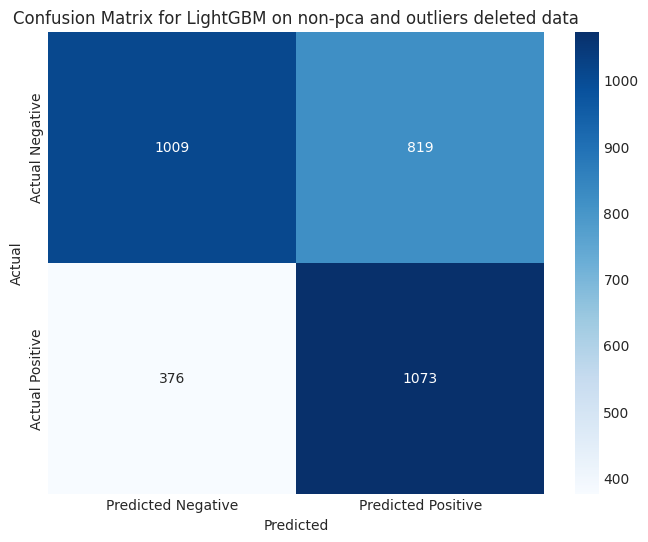

Model: XGBoost
Confusion Matrix:
[[1106  722]
 [ 541  908]]
Train Accuracy: 0.9137
Test Accuracy: 0.6146
------------------------------


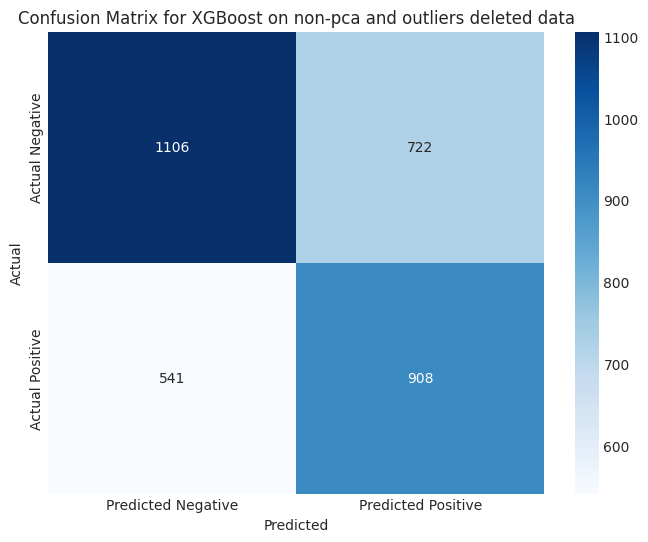

Model: Extra Trees
Confusion Matrix:
[[1144  684]
 [ 595  854]]
Train Accuracy: 1.0000
Test Accuracy: 0.6097
------------------------------


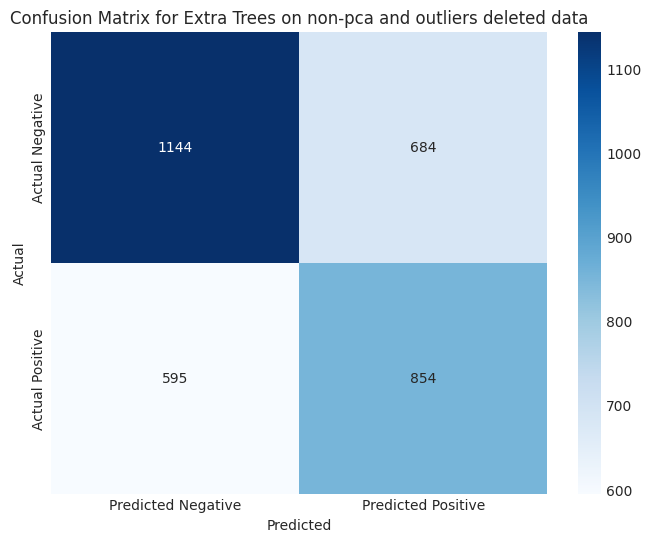

Model: K-Nearest Neighbors
Confusion Matrix:
[[1135  693]
 [ 570  879]]
Train Accuracy: 0.7518
Test Accuracy: 0.6146
------------------------------


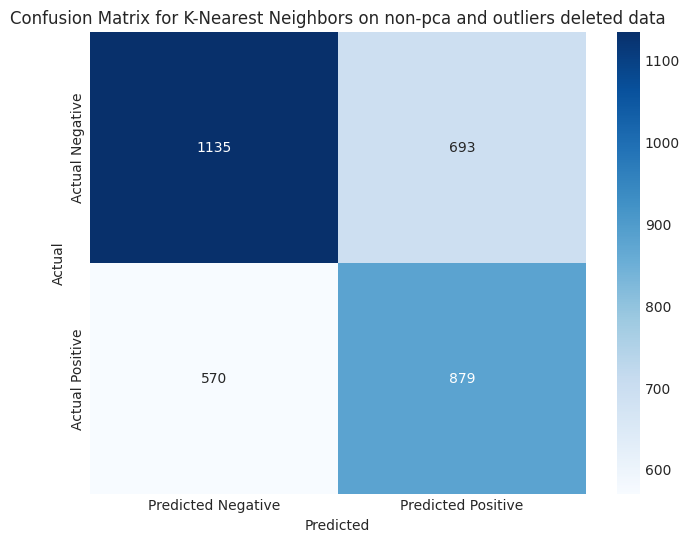

Model: Decision Tree
Confusion Matrix:
[[1164  664]
 [ 642  807]]
Train Accuracy: 1.0000
Test Accuracy: 0.6015
------------------------------


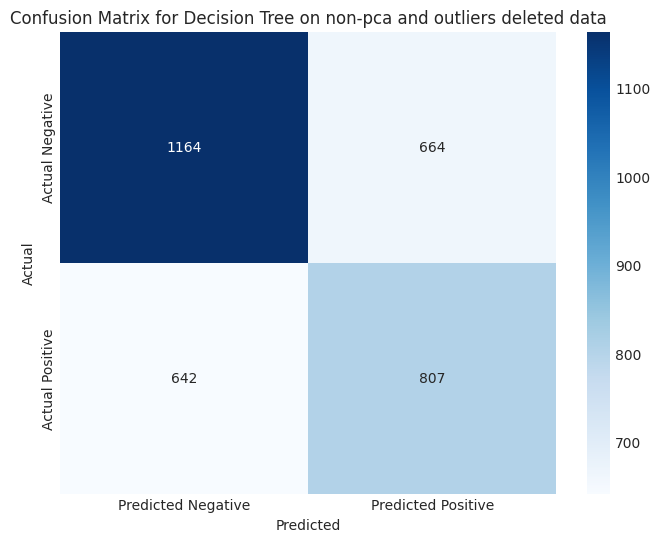

Evaluating on non-pca and winsorized data
**************************************************
Model: Random Forest
Confusion Matrix:
[[1181  982]
 [ 128 1339]]
Train Accuracy: 0.7181
Test Accuracy: 0.6942
------------------------------


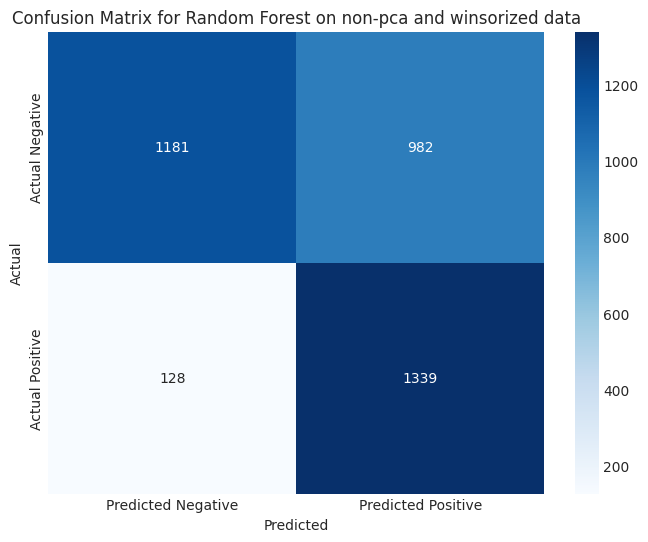

Model: Logistic Regression
Confusion Matrix:
[[1489  674]
 [ 638  829]]
Train Accuracy: 0.6336
Test Accuracy: 0.6386
------------------------------


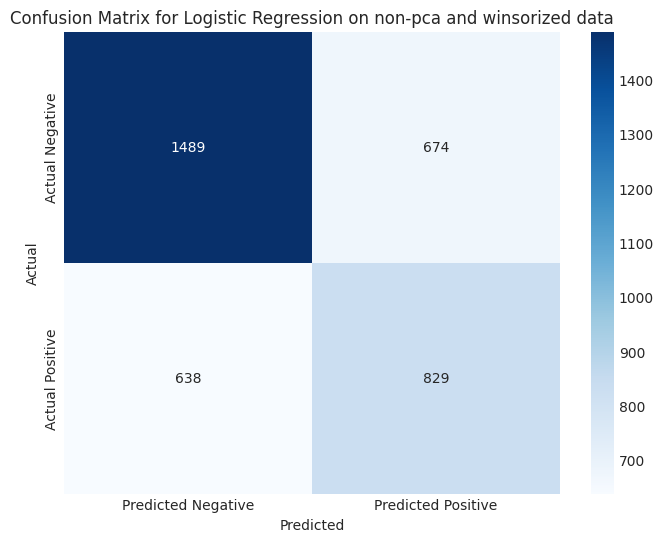

Model: Gradient Boosting
Confusion Matrix:
[[1245  918]
 [ 206 1261]]
Train Accuracy: 0.7210
Test Accuracy: 0.6904
------------------------------


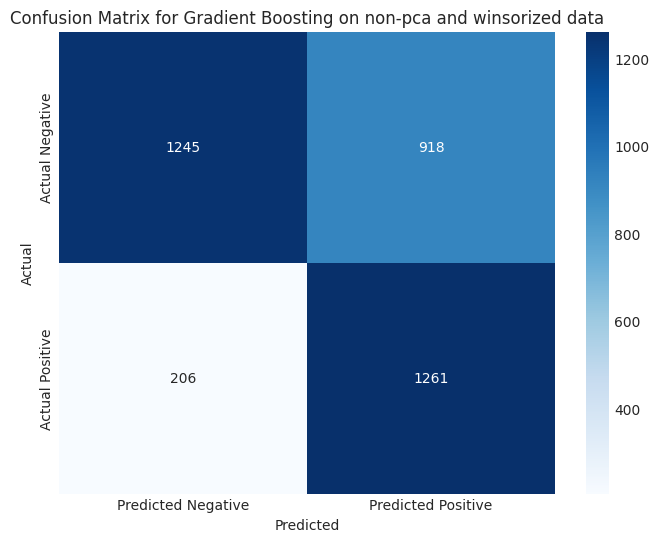

Model: AdaBoost
Confusion Matrix:
[[1346  817]
 [ 328 1139]]
Train Accuracy: 0.6882
Test Accuracy: 0.6846
------------------------------


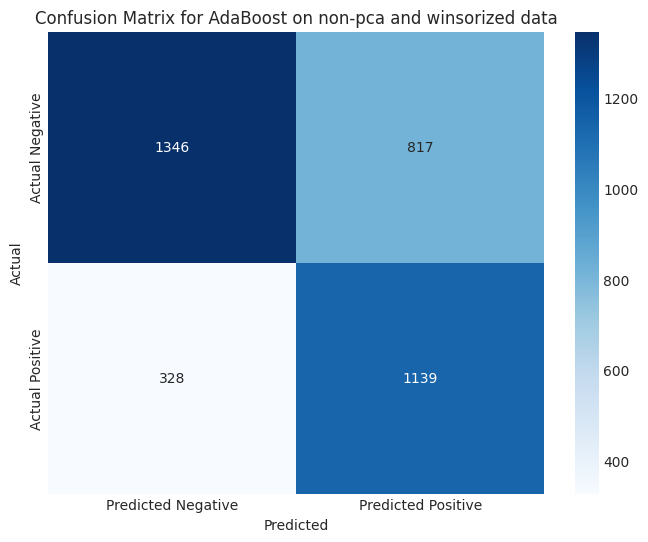

Model: CatBoost
Confusion Matrix:
[[1361  802]
 [ 419 1048]]
Train Accuracy: 0.8590
Test Accuracy: 0.6636
------------------------------


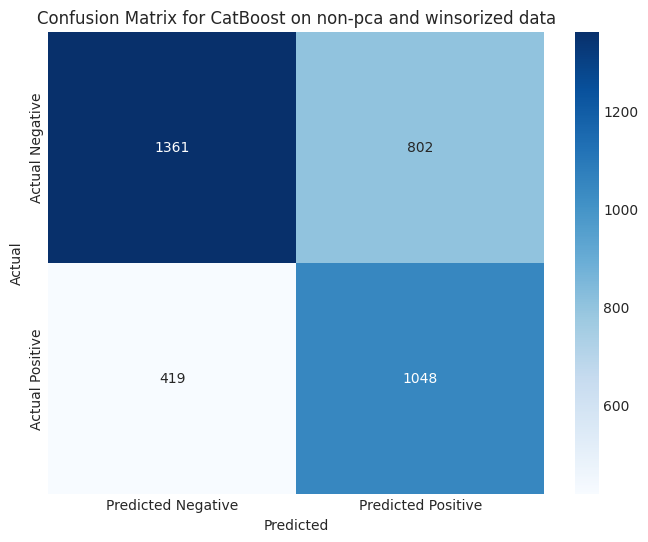

[LightGBM] [Info] Number of positive: 2969, number of negative: 4400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 815
[LightGBM] [Info] Number of data points in the train set: 7369, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402904 -> initscore=-0.393379
[LightGBM] [Info] Start training from score -0.393379
Model: LightGBM
Confusion Matrix:
[[1372  791]
 [ 423 1044]]
Train Accuracy: 0.8685
Test Accuracy: 0.6656
------------------------------


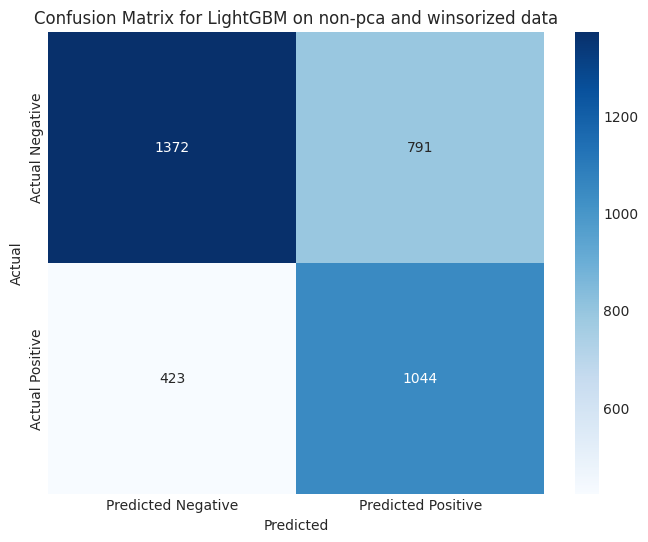

Model: XGBoost
Confusion Matrix:
[[1480  683]
 [ 523  944]]
Train Accuracy: 0.9343
Test Accuracy: 0.6678
------------------------------


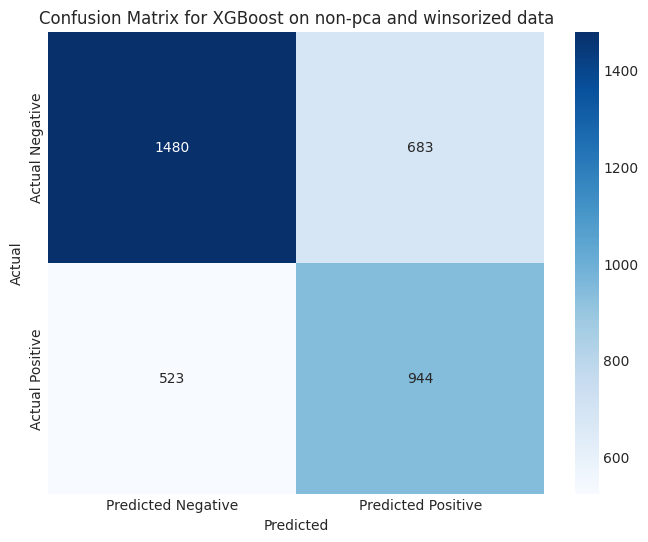

Model: Extra Trees
Confusion Matrix:
[[1469  694]
 [ 615  852]]
Train Accuracy: 1.0000
Test Accuracy: 0.6394
------------------------------


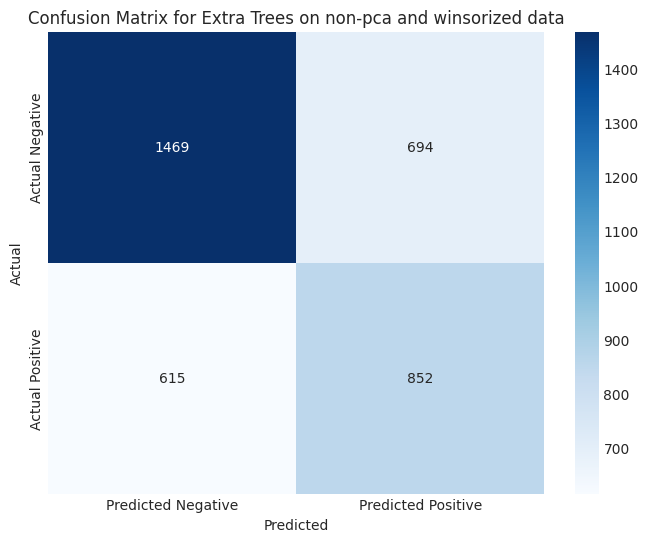

Model: K-Nearest Neighbors
Confusion Matrix:
[[1483  680]
 [ 579  888]]
Train Accuracy: 0.7780
Test Accuracy: 0.6532
------------------------------


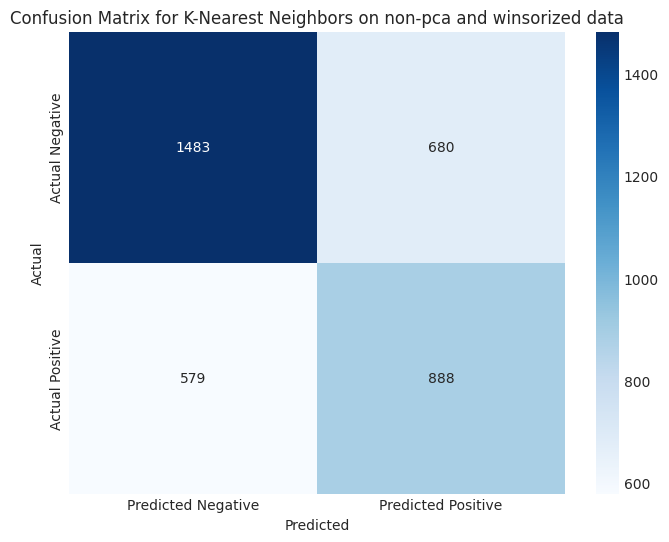

Model: Decision Tree
Confusion Matrix:
[[1562  601]
 [ 713  754]]
Train Accuracy: 1.0000
Test Accuracy: 0.6380
------------------------------


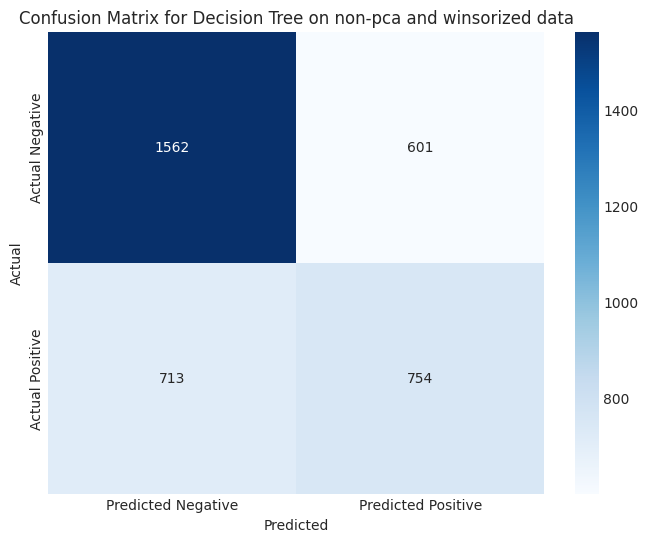

Evaluating on pca and outliers deleted data
**************************************************
Model: Random Forest
Confusion Matrix:
[[ 982  846]
 [ 393 1056]]
Train Accuracy: 0.7075
Test Accuracy: 0.6219
------------------------------


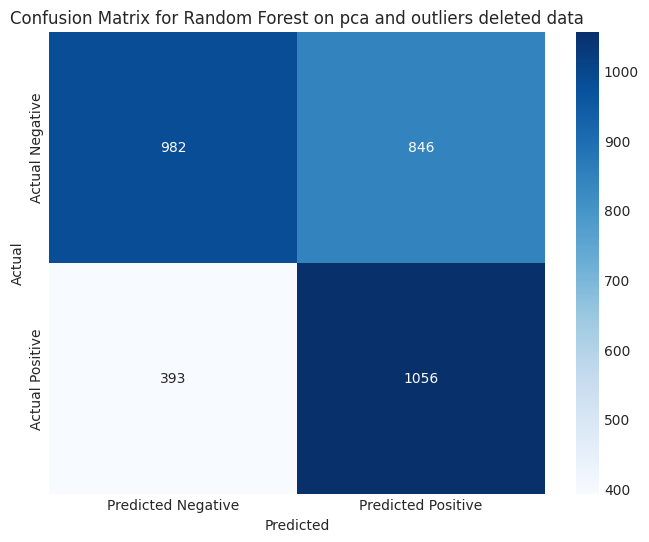

Model: Logistic Regression
Confusion Matrix:
[[1181  647]
 [ 637  812]]
Train Accuracy: 0.6039
Test Accuracy: 0.6082
------------------------------


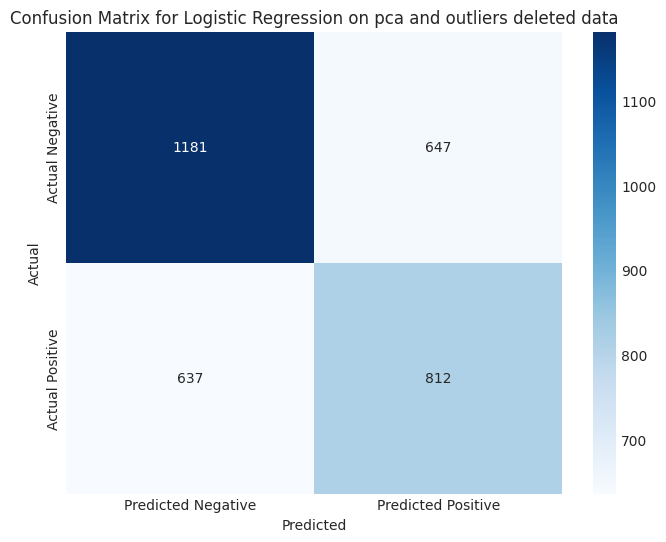

Model: Gradient Boosting
Confusion Matrix:
[[ 965  863]
 [ 339 1110]]
Train Accuracy: 0.6958
Test Accuracy: 0.6332
------------------------------


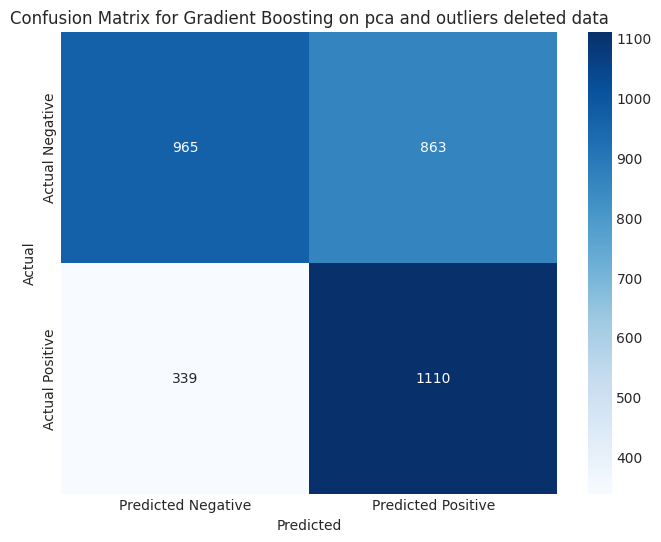

Model: AdaBoost
Confusion Matrix:
[[1018  810]
 [ 449 1000]]
Train Accuracy: 0.6489
Test Accuracy: 0.6158
------------------------------


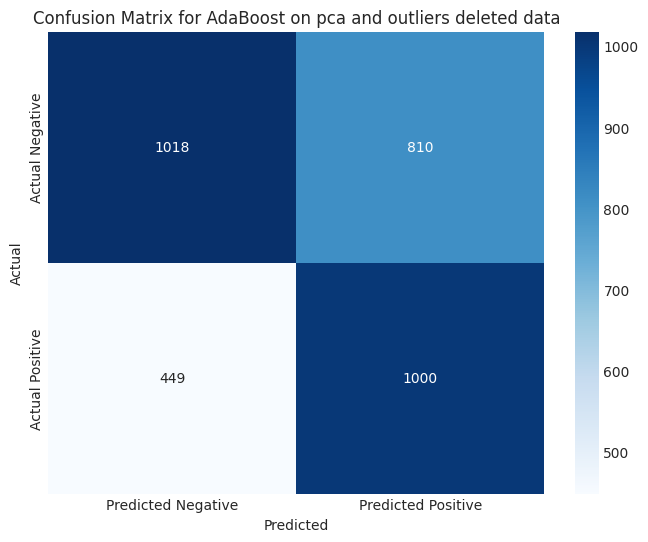

Model: CatBoost
Confusion Matrix:
[[1044  784]
 [ 441 1008]]
Train Accuracy: 0.8112
Test Accuracy: 0.6262
------------------------------


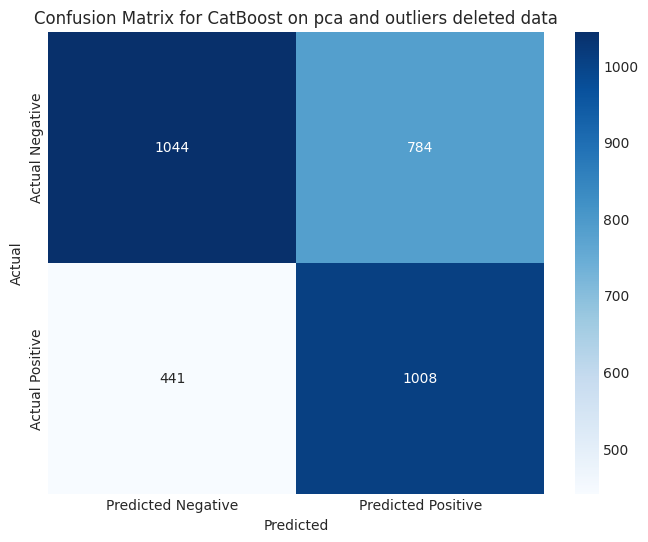

[LightGBM] [Info] Number of positive: 2949, number of negative: 3704
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000777 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 6653, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.443259 -> initscore=-0.227947
[LightGBM] [Info] Start training from score -0.227947
Model: LightGBM
Confusion Matrix:
[[1046  782]
 [ 457  992]]
Train Accuracy: 0.8199
Test Accuracy: 0.6219
------------------------------


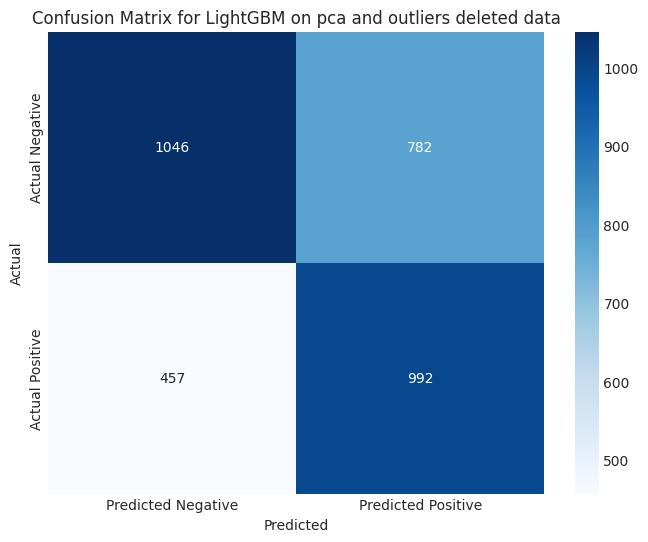

Model: XGBoost
Confusion Matrix:
[[1119  709]
 [ 565  884]]
Train Accuracy: 0.8997
Test Accuracy: 0.6112
------------------------------


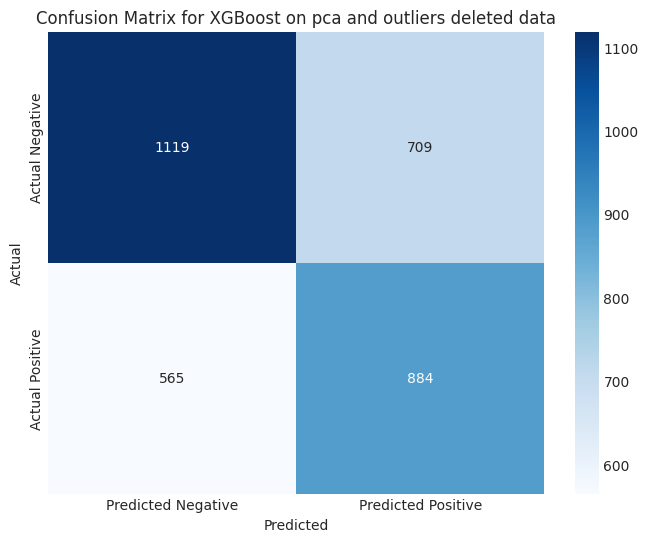

Model: Extra Trees
Confusion Matrix:
[[1186  642]
 [ 663  786]]
Train Accuracy: 1.0000
Test Accuracy: 0.6018
------------------------------


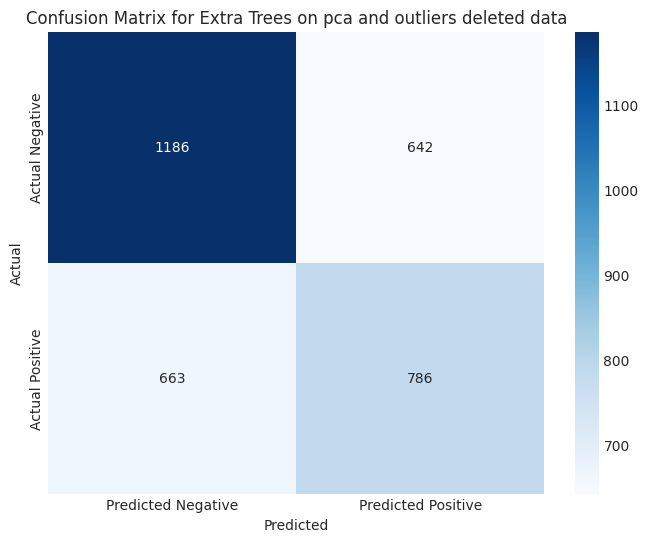

Model: K-Nearest Neighbors
Confusion Matrix:
[[1129  699]
 [ 604  845]]
Train Accuracy: 0.7442
Test Accuracy: 0.6024
------------------------------


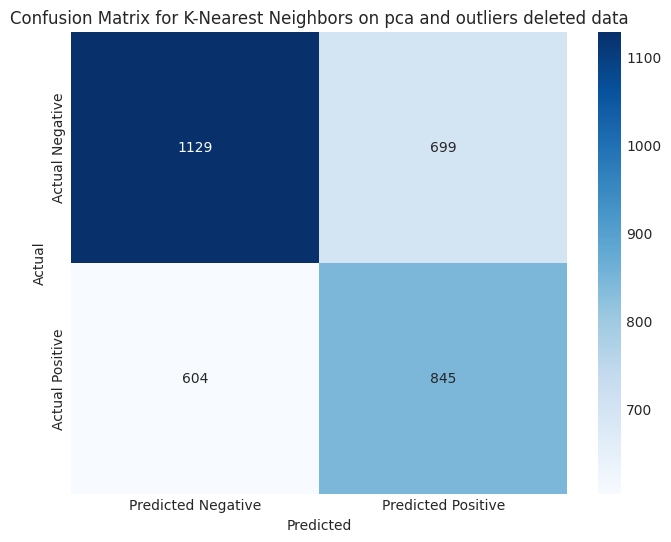

Model: Decision Tree
Confusion Matrix:
[[1194  634]
 [ 671  778]]
Train Accuracy: 1.0000
Test Accuracy: 0.6018
------------------------------


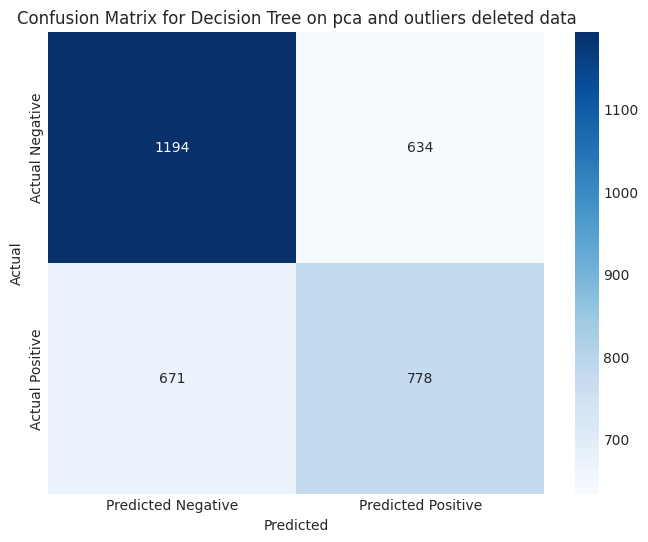

Evaluating on pca and winsorized data
**************************************************
Model: Random Forest
Confusion Matrix:
[[1263  900]
 [ 290 1177]]
Train Accuracy: 0.7247
Test Accuracy: 0.6722
------------------------------


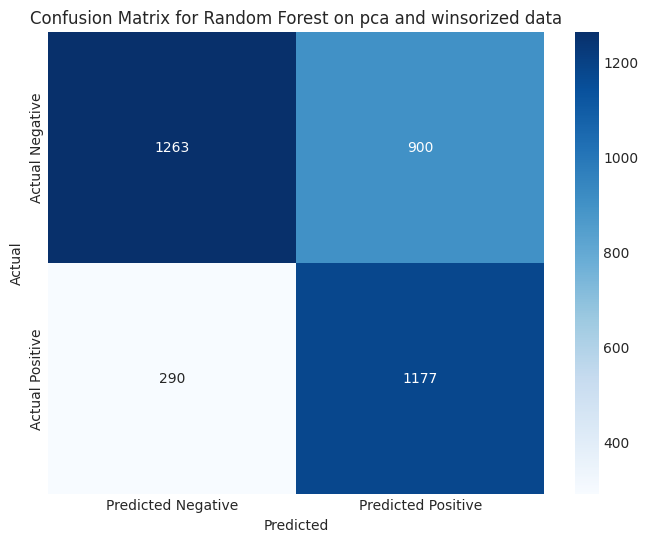

Model: Logistic Regression
Confusion Matrix:
[[1541  622]
 [ 643  824]]
Train Accuracy: 0.6473
Test Accuracy: 0.6515
------------------------------


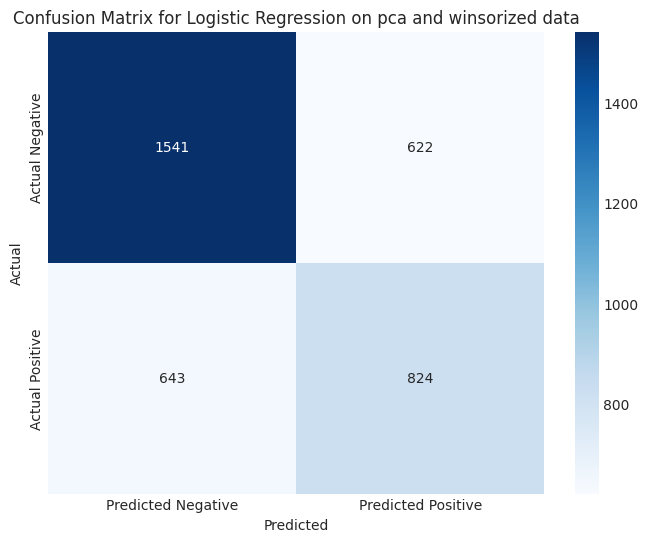

Model: Gradient Boosting
Confusion Matrix:
[[1276  887]
 [ 299 1168]]
Train Accuracy: 0.7203
Test Accuracy: 0.6733
------------------------------


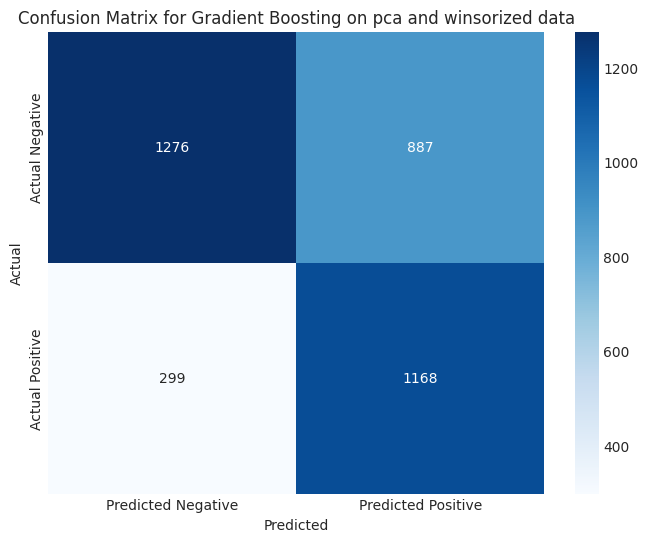

Model: AdaBoost
Confusion Matrix:
[[1410  753]
 [ 434 1033]]
Train Accuracy: 0.6803
Test Accuracy: 0.6730
------------------------------


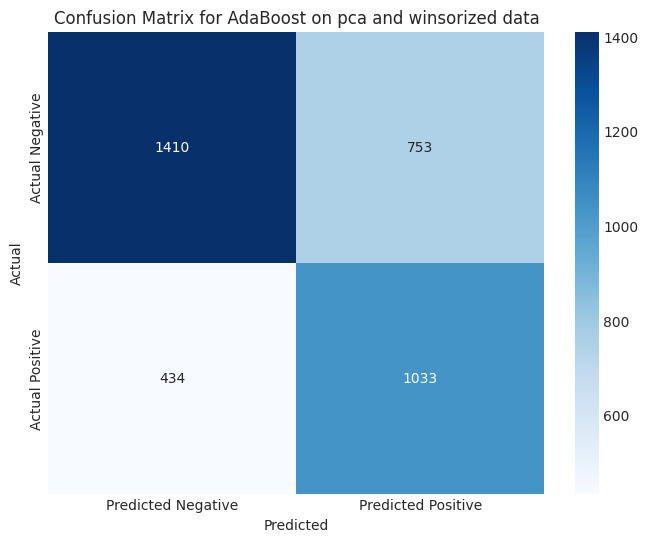

Model: CatBoost
Confusion Matrix:
[[1386  777]
 [ 472  995]]
Train Accuracy: 0.8519
Test Accuracy: 0.6559
------------------------------


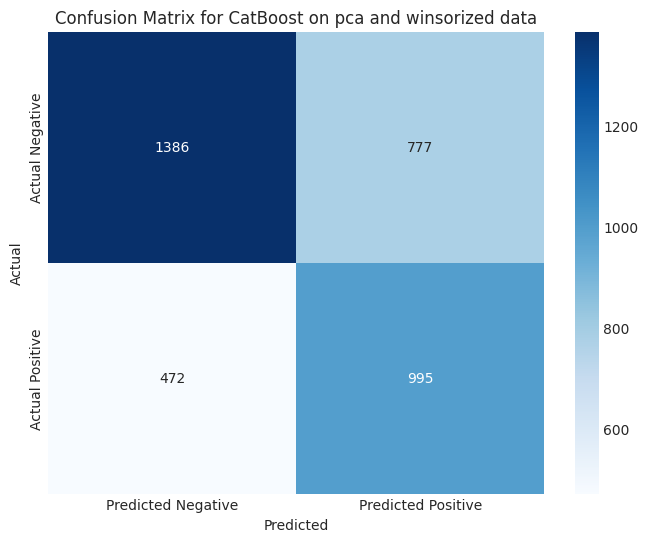

[LightGBM] [Info] Number of positive: 2969, number of negative: 4400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 803
[LightGBM] [Info] Number of data points in the train set: 7369, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.402904 -> initscore=-0.393379
[LightGBM] [Info] Start training from score -0.393379
Model: LightGBM
Confusion Matrix:
[[1406  757]
 [ 446 1021]]
Train Accuracy: 0.8502
Test Accuracy: 0.6686
------------------------------


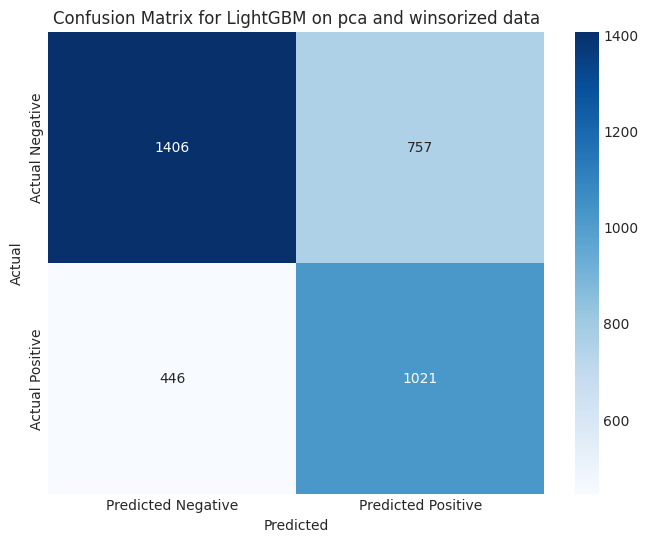

Model: XGBoost
Confusion Matrix:
[[1500  663]
 [ 553  914]]
Train Accuracy: 0.9258
Test Accuracy: 0.6650
------------------------------


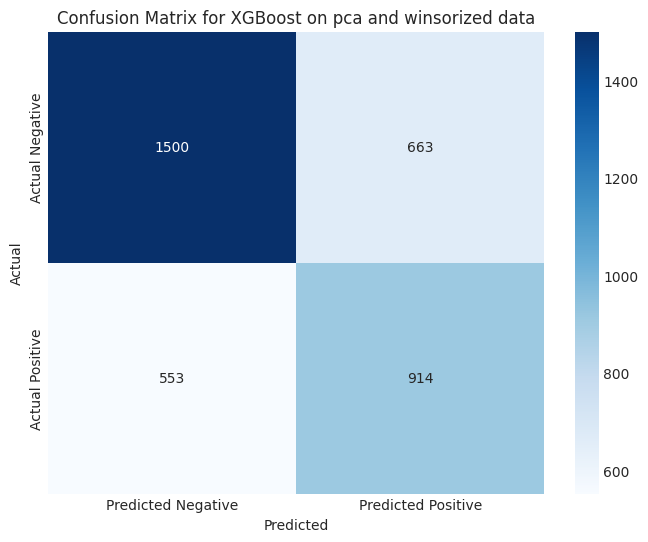

Model: Extra Trees
Confusion Matrix:
[[1545  618]
 [ 642  825]]
Train Accuracy: 1.0000
Test Accuracy: 0.6529
------------------------------


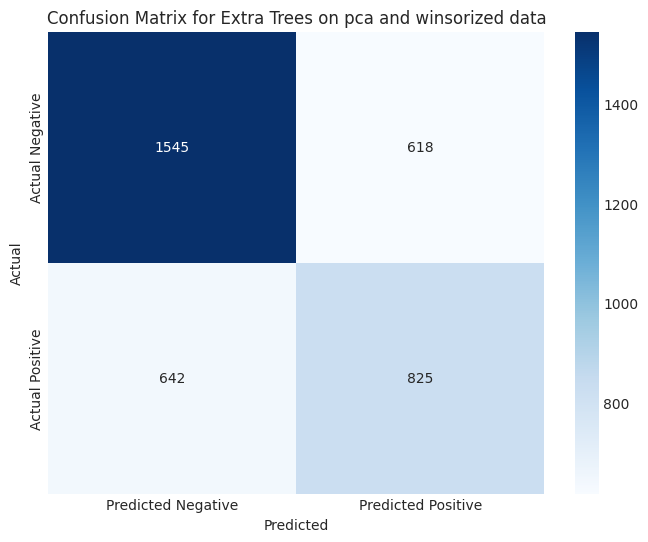

Model: K-Nearest Neighbors
Confusion Matrix:
[[1472  691]
 [ 609  858]]
Train Accuracy: 0.7679
Test Accuracy: 0.6419
------------------------------


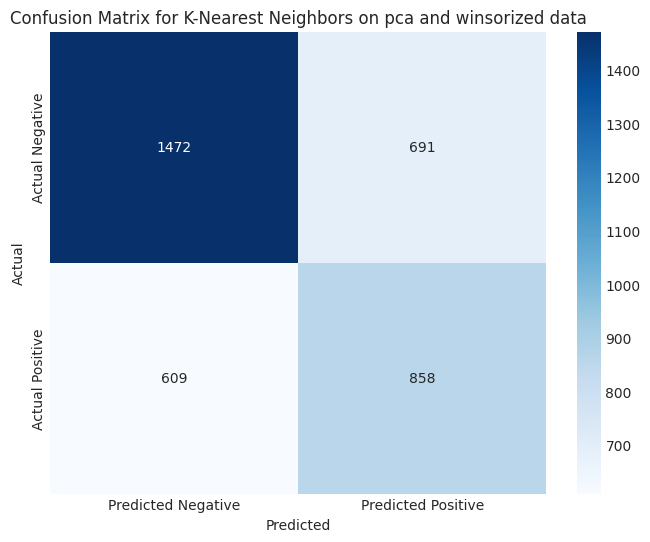

Model: Decision Tree
Confusion Matrix:
[[1543  620]
 [ 662  805]]
Train Accuracy: 1.0000
Test Accuracy: 0.6468
------------------------------


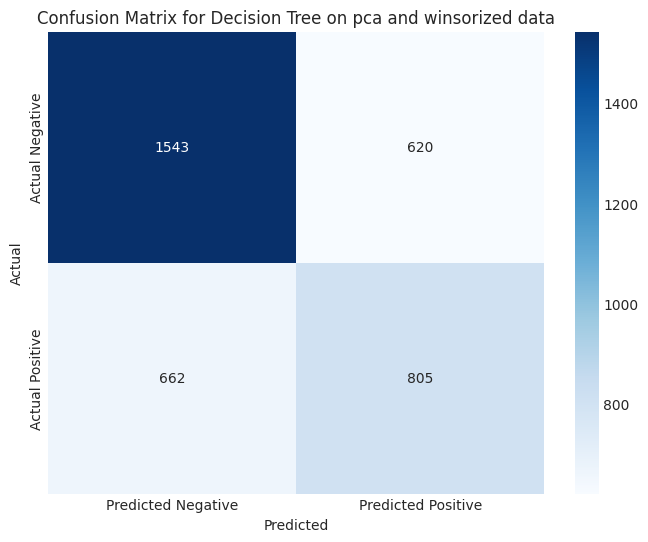

In [39]:
# Iterate over each dataset and model
for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
    print(f"Evaluating on {dataset_name}")
    print("*" * 50)
    for model_name, model in models.items():
        cm, train_acc, test_acc, y_pred = evaluate_model(model, X_train, X_test, y_train, y_test)
        results[dataset_name].append((model_name, train_acc, test_acc))
        print(f"Model: {model_name}")
        print("Confusion Matrix:")
        print(cm)
        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy: {test_acc:.4f}")
        print("-" * 30)
        # Save predictions to CSV
        prediction_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
        prediction_df.to_csv(f"{dataset_name}_{model_name}_predictions.csv", index=False)
        # Plot confusion matrix
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title(f'Confusion Matrix for {model_name} on {dataset_name}')
        plt.savefig(f"{dataset_name}_{model_name}_confusion_matrix.png")
        plt.show()
    print("=" * 50)

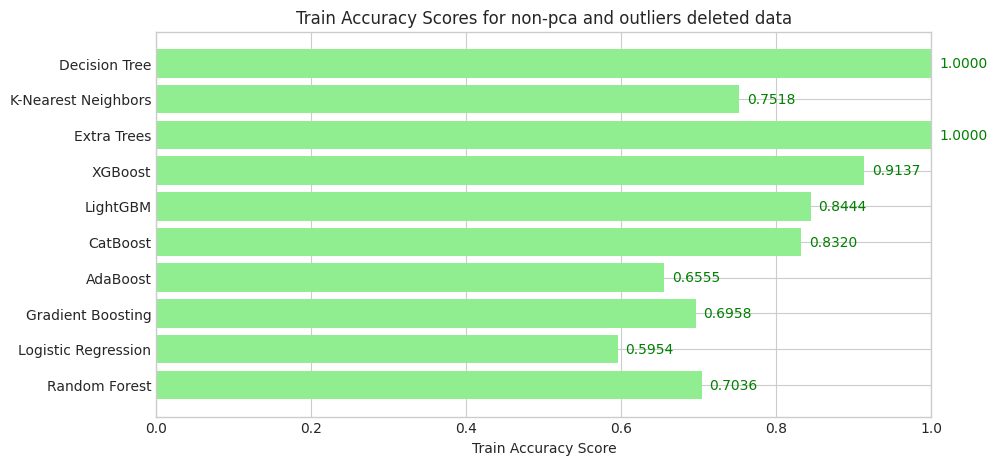

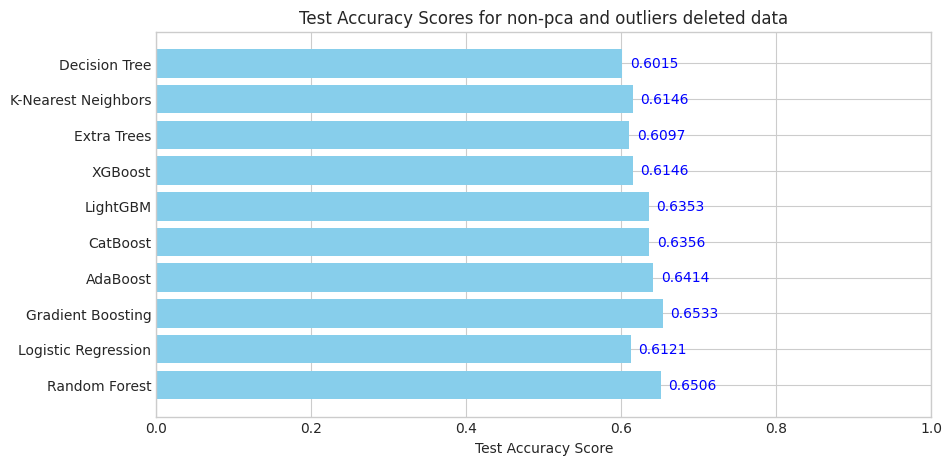

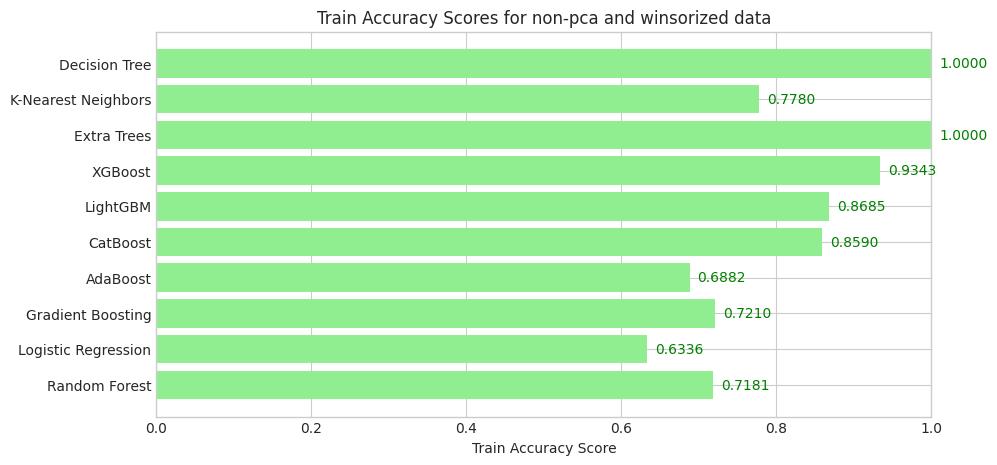

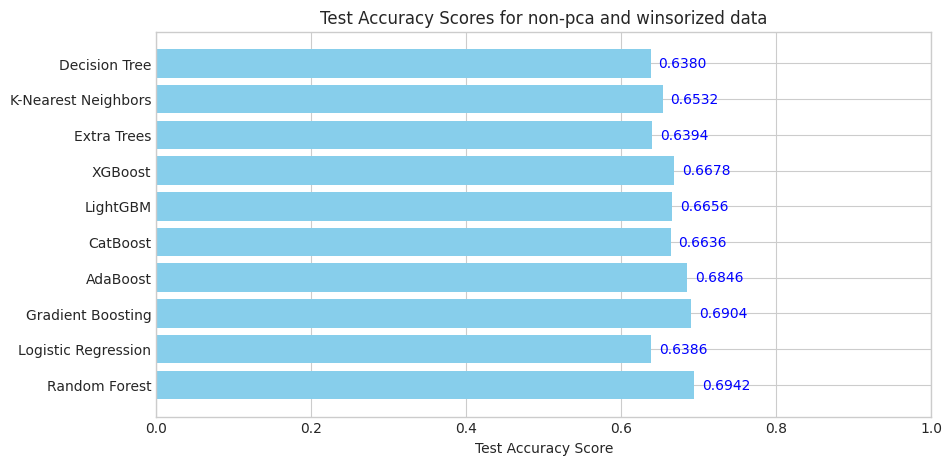

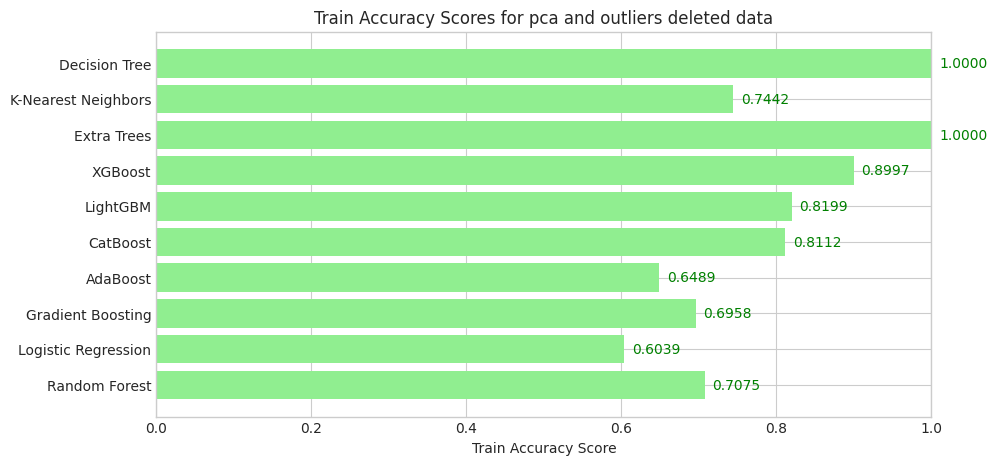

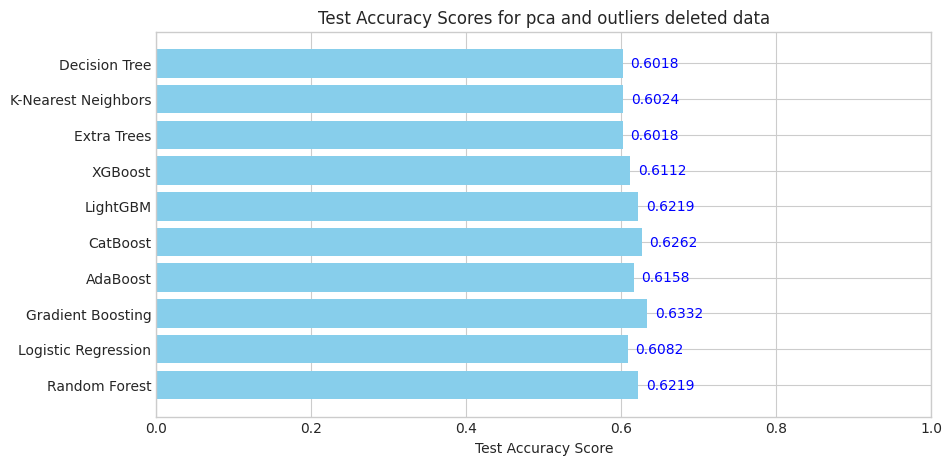

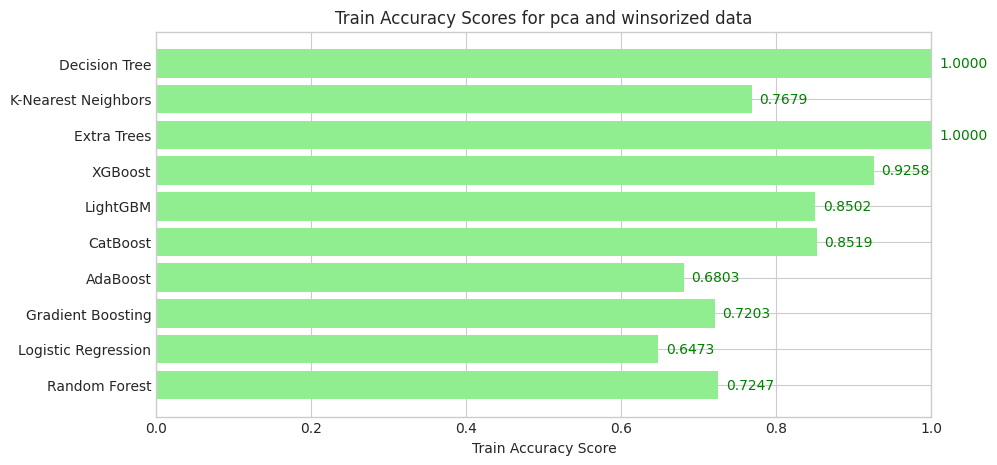

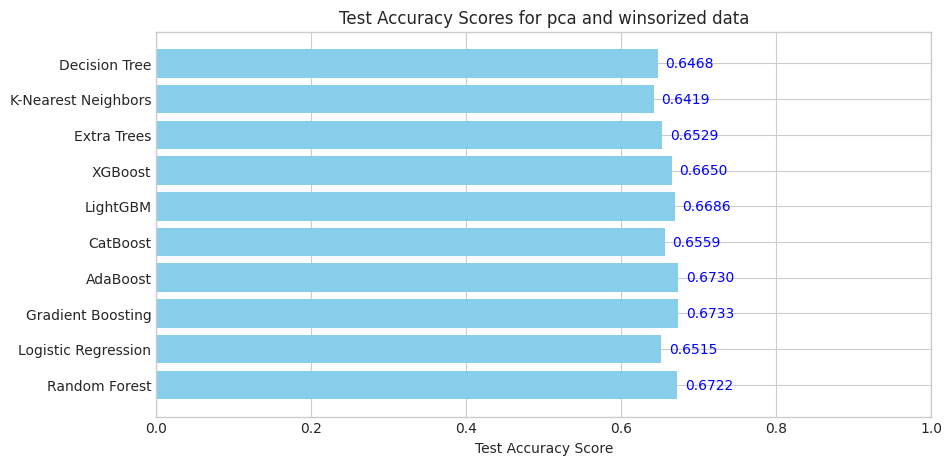

In [40]:
# Plotting accuracy scores
for dataset_name, accuracies in results.items():
    models = [x[0] for x in accuracies]
    train_scores = [x[1] for x in accuracies]
    test_scores = [x[2] for x in accuracies]
    
    # Plot train accuracy
    plt.figure(figsize=(10, 5))
    plt.barh(models, train_scores, color='lightgreen')
    plt.xlabel('Train Accuracy Score')
    plt.title(f'Train Accuracy Scores for {dataset_name}')
    plt.xlim(0, 1)
    for i, v in enumerate(train_scores):
        plt.text(v + 0.01, i, f"{v:.4f}", color='green', va='center')
    plt.savefig(f"{dataset_name}_train_accuracy_scores.png")
    plt.show()
    
    # Plot test accuracy
    plt.figure(figsize=(10, 5))
    plt.barh(models, test_scores, color='skyblue')
    plt.xlabel('Test Accuracy Score')
    plt.title(f'Test Accuracy Scores for {dataset_name}')
    plt.xlim(0, 1)
    for i, v in enumerate(test_scores):
        plt.text(v + 0.01, i, f"{v:.4f}", color='blue', va='center')
    plt.savefig(f"{dataset_name}_test_accuracy_scores.png")
    plt.show()

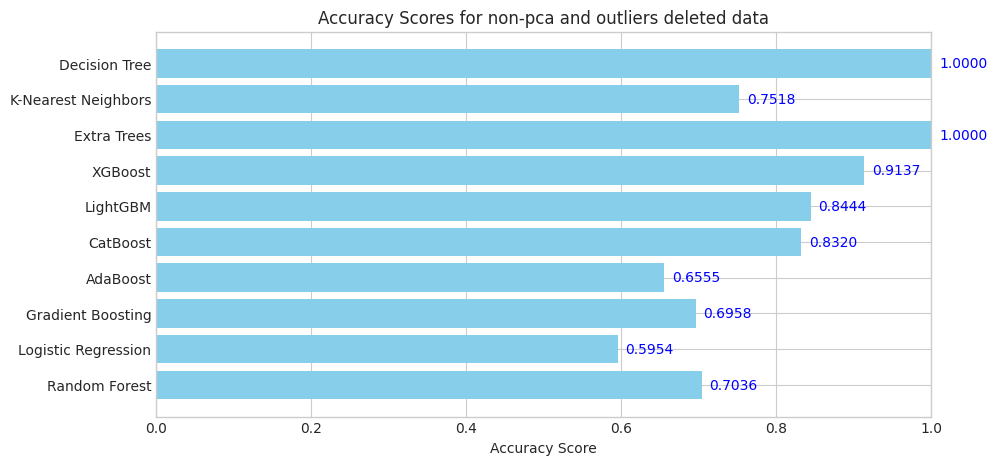

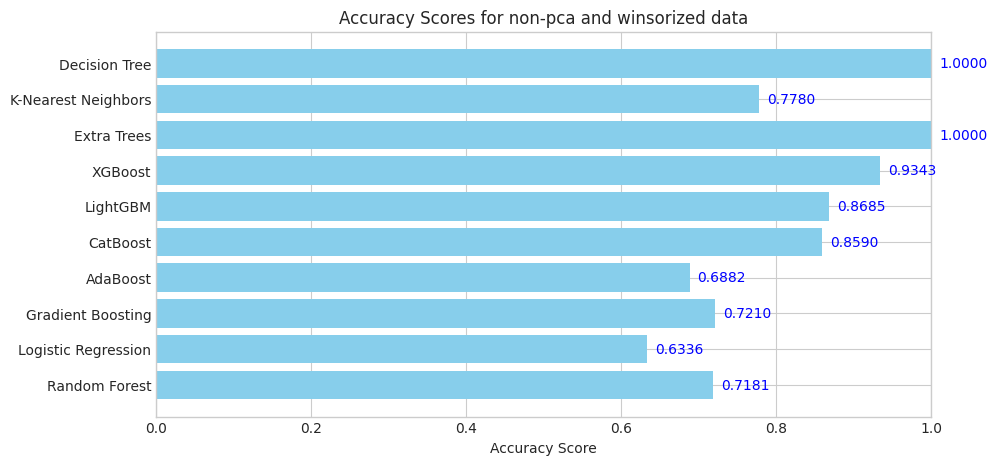

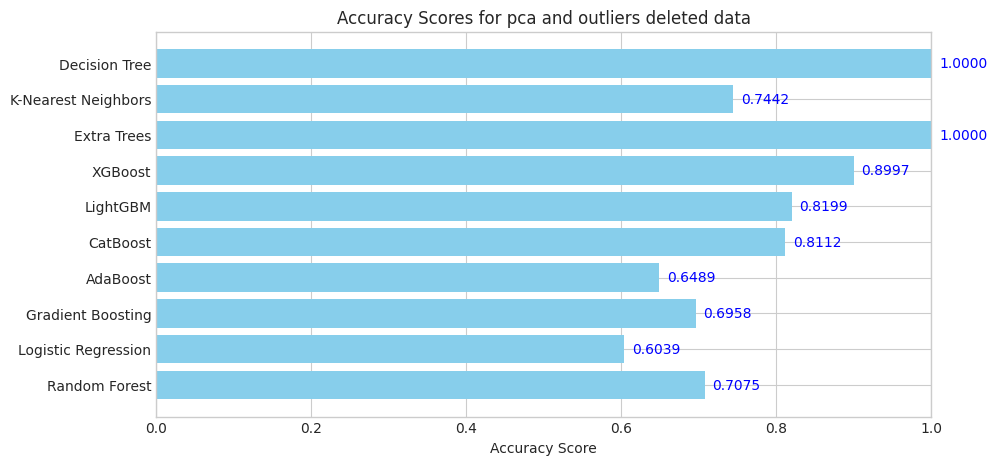

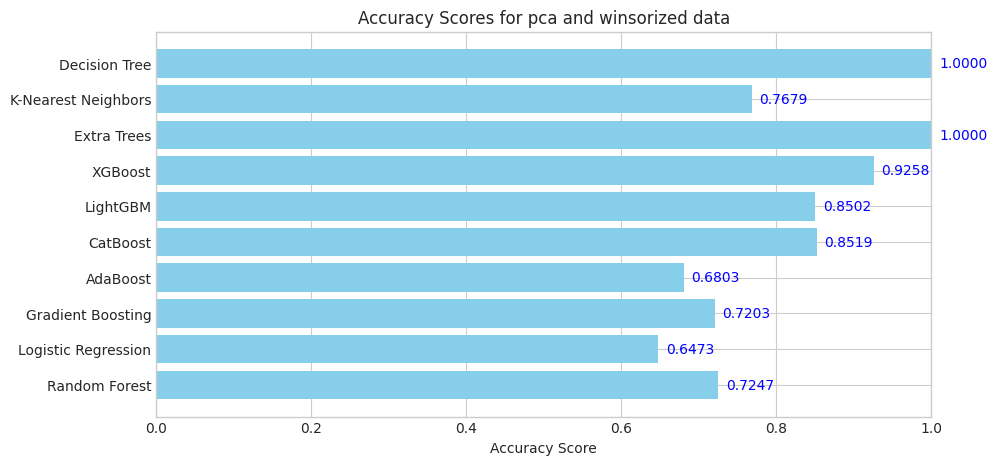

In [41]:
# Plotting accuracy scores
for dataset_name, accuracies in results.items():
    models = [x[0] for x in accuracies]
    scores = [x[1] for x in accuracies]
    plt.figure(figsize=(10, 5))
    plt.barh(models, scores, color='skyblue')
    plt.xlabel('Accuracy Score')
    plt.title(f'Accuracy Scores for {dataset_name}')
    plt.xlim(0, 1)
    for i, v in enumerate(scores):
        plt.text(v + 0.01, i, f"{v:.4f}", color='blue', va='center')
    plt.savefig(f"{dataset_name}_accuracy_scores.png")
    plt.show()rf.get_params()
params = {"max_depth":[x for x in range (3,15)],
         "min_samples_split":[x for x in range (2,5)],
         "min_samples_leaf":[x for x in range (1,3)],
         }rf.get_params()
params = {"max_depth":[x for x in range (3,15)],
         "min_samples_split":[x for x in range (2,5)],
         "min_samples_leaf":[x for x in range (1,3)],
         }